# Flights, airports and airlines

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go
from scipy import stats

os.chdir("D:\\Maja\\PDS\\Flights projekat")

# Importing data

In [2]:
airlines = pd.read_csv('airlines.csv')
airlines

IATA_CODE                       AIRLINE
0         UA         United Air Lines Inc.
1         AA        American Airlines Inc.
2         US               US Airways Inc.
3         F9        Frontier Airlines Inc.
4         B6               JetBlue Airways
5         OO         Skywest Airlines Inc.
6         AS          Alaska Airlines Inc.
7         NK              Spirit Air Lines
8         WN        Southwest Airlines Co.
9         DL          Delta Air Lines Inc.
10        EV   Atlantic Southeast Airlines
11        HA        Hawaiian Airlines Inc.
12        MQ  American Eagle Airlines Inc.
13        VX                Virgin America

In [3]:
airlines.shape

(14, 2)

In [4]:
airlines.dtypes

IATA_CODE    object
AIRLINE      object
dtype: object

In [5]:
airports = pd.read_csv('airports.csv') #imena aerodroma
airports

IATA_CODE                              AIRPORT  \
0         ABE  Lehigh Valley International Airport   
1         ABI             Abilene Regional Airport   
2         ABQ    Albuquerque International Sunport   
3         ABR            Aberdeen Regional Airport   
4         ABY   Southwest Georgia Regional Airport   
..        ...                                  ...   
317       WRG                     Wrangell Airport   
318       WYS               Westerly State Airport   
319       XNA  Northwest Arkansas Regional Airport   
320       YAK                      Yakutat Airport   
321       YUM           Yuma International Airport   

                               CITY STATE COUNTRY  LATITUDE  LONGITUDE  
0                         Allentown    PA     USA  40.65236  -75.44040  
1                           Abilene    TX     USA  32.41132  -99.68190  
2                       Albuquerque    NM     USA  35.04022 -106.60919  
3                          Aberdeen    SD     USA  45.44906  -98.42183  
4                            Albany    GA     USA  31.53552  -84.19447  
..                              ...   ...     ...       ...        ...  
317                        Wrangell    AK     USA  56.48433 -132.36982  
318                West Yellowstone    MT     USA  44.68840 -111.11764  
319  Fayetteville/Springdale/Rogers    AR     USA  36.28187  -94.30681  
320                         Yakutat    AK     USA  59.50336 -139.66023  
321                            Yuma    AZ     USA  32.65658 -114.60597  

[322 rows x 7 columns]

In [6]:
airports.shape

(322, 7)

In [7]:
airports.dtypes

IATA_CODE     object
AIRPORT       object
CITY          object
STATE         object
COUNTRY       object
LATITUDE     float64
LONGITUDE    float64
dtype: object

In [8]:
airports.dtypes.value_counts()

object     5
float64    2
dtype: int64

In [9]:
flights = pd.read_csv('flights.csv', low_memory=False) 
flights

YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
0        2015      1    1            4      AS             98      N407AS   
1        2015      1    1            4      AA           2336      N3KUAA   
2        2015      1    1            4      US            840      N171US   
3        2015      1    1            4      AA            258      N3HYAA   
4        2015      1    1            4      AS            135      N527AS   
...       ...    ...  ...          ...     ...            ...         ...   
5819074  2015     12   31            4      B6            688      N657JB   
5819075  2015     12   31            4      B6            745      N828JB   
5819076  2015     12   31            4      B6           1503      N913JB   
5819077  2015     12   31            4      B6            333      N527JB   
5819078  2015     12   31            4      B6            839      N534JB   

        ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  ...  \
0                  ANC                 SEA                    5  ...   
1                  LAX                 PBI                   10  ...   
2                  SFO                 CLT                   20  ...   
3                  LAX                 MIA                   20  ...   
4                  SEA                 ANC                   25  ...   
...                ...                 ...                  ...  ...   
5819074            LAX                 BOS                 2359  ...   
5819075            JFK                 PSE                 2359  ...   
5819076            JFK                 SJU                 2359  ...   
5819077            MCO                 SJU                 2359  ...   
5819078            JFK                 BQN                 2359  ...   

         ARRIVAL_TIME  ARRIVAL_DELAY  DIVERTED  CANCELLED  \
0               408.0          -22.0         0          0   
1               741.0           -9.0         0          0   
2               811.0            5.0         0          0   
3               756.0           -9.0         0          0   
4               259.0          -21.0         0          0   
...               ...            ...       ...        ...   
5819074         753.0          -26.0         0          0   
5819075         430.0          -16.0         0          0   
5819076         432.0           -8.0         0          0   
5819077         330.0          -10.0         0          0   
5819078         442.0            2.0         0          0   

         CANCELLATION_REASON  AIR_SYSTEM_DELAY  SECURITY_DELAY  AIRLINE_DELAY  \
0                        NaN               NaN             NaN            NaN   
1                        NaN               NaN             NaN            NaN   
2                        NaN               NaN             NaN            NaN   
3                        NaN               NaN             NaN            NaN   
4                        NaN               NaN             NaN            NaN   
...                      ...               ...             ...            ...   
5819074                  NaN               NaN             NaN            NaN   
5819075                  NaN               NaN             NaN            NaN   
5819076                  NaN               NaN             NaN            NaN   
5819077                  NaN               NaN             NaN            NaN   
5819078                  NaN               NaN             NaN            NaN   

         LATE_AIRCRAFT_DELAY  WEATHER_DELAY  
0                        NaN            NaN  
1                        NaN            NaN  
2                        NaN            NaN  
3                        NaN            NaN  
4                        NaN            NaN  
...                      ...            ...  
5819074                  NaN            NaN  
5819075                  NaN            NaN  
5819076                  NaN            NaN  
5819077                  NaN            NaN  
5819078

In [10]:
flights.shape

(5819079, 31)

In [11]:
flights.dtypes

YEAR                     int64
MONTH                    int64
DAY                      int64
DAY_OF_WEEK              int64
AIRLINE                 object
FLIGHT_NUMBER            int64
TAIL_NUMBER             object
ORIGIN_AIRPORT          object
DESTINATION_AIRPORT     object
SCHEDULED_DEPARTURE      int64
DEPARTURE_TIME         float64
DEPARTURE_DELAY        float64
TAXI_OUT               float64
WHEELS_OFF             float64
SCHEDULED_TIME         float64
ELAPSED_TIME           float64
AIR_TIME               float64
DISTANCE                 int64
WHEELS_ON              float64
TAXI_IN                float64
SCHEDULED_ARRIVAL        int64
ARRIVAL_TIME           float64
ARRIVAL_DELAY          float64
DIVERTED                 int64
CANCELLED                int64
CANCELLATION_REASON     object
AIR_SYSTEM_DELAY       float64
SECURITY_DELAY         float64
AIRLINE_DELAY          float64
LATE_AIRCRAFT_DELAY    float64
WEATHER_DELAY          float64
dtype: object

In [12]:
flights.dtypes.value_counts()

float64    16
int64      10
object      5
dtype: int64

In [13]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

In [14]:
flights.describe()

YEAR         MONTH           DAY   DAY_OF_WEEK  FLIGHT_NUMBER  \
count  5819079.0  5.819079e+06  5.819079e+06  5.819079e+06   5.819079e+06   
mean      2015.0  6.524085e+00  1.570459e+01  3.926941e+00   2.173093e+03   
std          0.0  3.405137e+00  8.783425e+00  1.988845e+00   1.757064e+03   
min       2015.0  1.000000e+00  1.000000e+00  1.000000e+00   1.000000e+00   
25%       2015.0  4.000000e+00  8.000000e+00  2.000000e+00   7.300000e+02   
50%       2015.0  7.000000e+00  1.600000e+01  4.000000e+00   1.690000e+03   
75%       2015.0  9.000000e+00  2.300000e+01  6.000000e+00   3.230000e+03   
max       2015.0  1.200000e+01  3.100000e+01  7.000000e+00   9.855000e+03   

       SCHEDULED_DEPARTURE  DEPARTURE_TIME  DEPARTURE_DELAY      TAXI_OUT  \
count         5.819079e+06    5.732926e+06     5.732926e+06  5.730032e+06   
mean          1.329602e+03    1.335204e+03     9.370158e+00  1.607166e+01   
std           4.837518e+02    4.964233e+02     3.708094e+01  8.895574e+00   
min           1.000000e+00    1.000000e+00    -8.200000e+01  1.000000e+00   
25%           9.170000e+02    9.210000e+02    -5.000000e+00  1.100000e+01   
50%           1.325000e+03    1.330000e+03    -2.000000e+00  1.400000e+01   
75%           1.730000e+03    1.740000e+03     7.000000e+00  1.900000e+01   
max           2.359000e+03    2.400000e+03     1.988000e+03  2.250000e+02   

         WHEELS_OFF  ...  SCHEDULED_ARRIVAL  ARRIVAL_TIME  ARRIVAL_DELAY  \
count  5.730032e+06  ...       5.819079e+06  5.726566e+06   5.714008e+06   
mean   1.357171e+03  ...       1.493808e+03  1.476491e+03   4.407057e+00   
std    4.980094e+02  ...       5.071647e+02  5.263197e+02   3.927130e+01   
min    1.000000e+00  ...       1.000000e+00  1.000000e+00  -8.700000e+01   
25%    9.350000e+02  ...       1.110000e+03  1.059000e+03  -1.300000e+01   
50%    1.343000e+03  ...       1.520000e+03  1.512000e+03  -5.000000e+00   
75%    1.754000e+03  ...       1.918000e+03  1.917000e+03   8.000000e+00   
max    2.400000e+03  ...       2.400000e+03  2.400000e+03   1.971000e+03   

           DIVERTED     CANCELLED  AIR_SYSTEM_DELAY  SECURITY_DELAY  \
count  5.819079e+06  5.819079e+06      1.063439e+06    1.063439e+06   
mean   2.609863e-03  1.544643e-02      1.348057e+01    7.615387e-02   
std    5.102012e-02  1.233201e-01      2.800368e+01    2.143460e+00   
min    0.000000e+00  0.000000e+00      0.000000e+00    0.000000e+00   
25%    0.000000e+00  0.000000e+00      0.000000e+00    0.000000e+00   
50%    0.000000e+00  0.000000e+00      2.000000e+00    0.000000e+00   
75%    0.000000e+00  0.000000e+00      1.800000e+01    0.000000e+00   
max    1.000000e+00  1.000000e+00      1.134000e+03    5.730000e+02   

       AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  WEATHER_DELAY  
count   1.063439e+06         1.063439e+06   1.063439e+06  
mean    1.896955e+01         2.347284e+01   2.915290e+00  
std     4.816164e+01         4.319702e+01   2.043334e+01  
min     0.000000e+00         0.000000e+00   0.000000e+00  
25%     0.000000e+00         0.000000e+00   0.000000e+00  
50%     2.000000e+00         3.000000e+00   0.000000e+00  
75%     1.900000e+01         2.900000e+01   0.000000e+00  
max     1.971000e+03         1.331000e+03   1.211000e+03  

[8 rows x 26 columns]

# Data Cleaning

In [15]:
airlines.isnull().sum()

IATA_CODE    0
AIRLINE      0
dtype: int64

In [16]:
airports.isnull().sum()

IATA_CODE    0
AIRPORT      0
CITY         0
STATE        0
COUNTRY      0
LATITUDE     3
LONGITUDE    3
dtype: int64

In [17]:
airports[airports["LATITUDE"].isna()]

IATA_CODE                                            AIRPORT  \
96        ECP    Northwest Florida Beaches International Airport   
234       PBG                  Plattsburgh International Airport   
313       UST  Northeast Florida Regional Airport (St. August...   

              CITY STATE COUNTRY  LATITUDE  LONGITUDE  
96     Panama City    FL     USA       NaN        NaN  
234    Plattsburgh    NY     USA       NaN        NaN  
313  St. Augustine    FL     USA       NaN        NaN

In [18]:
airports[airports["IATA_CODE"].isin(['ECP', 'PBG', 'UST'])]

IATA_CODE                                            AIRPORT  \
96        ECP    Northwest Florida Beaches International Airport   
234       PBG                  Plattsburgh International Airport   
313       UST  Northeast Florida Regional Airport (St. August...   

              CITY STATE COUNTRY  LATITUDE  LONGITUDE  
96     Panama City    FL     USA       NaN        NaN  
234    Plattsburgh    NY     USA       NaN        NaN  
313  St. Augustine    FL     USA       NaN        NaN

In [19]:
airports.shape

(322, 7)

In [20]:
airports = airports.dropna()
airports.shape

(319, 7)

In [21]:
airports['COUNTRY'].unique()

array(['USA'], dtype=object)

In [22]:
airports.shape[0] == airports['COUNTRY'].value_counts()

USA    True
Name: COUNTRY, dtype: bool

In [23]:
airports = airports.drop('COUNTRY', axis=1)
airports.shape

(319, 6)

In [24]:
airports.isnull().sum()

IATA_CODE    0
AIRPORT      0
CITY         0
STATE        0
LATITUDE     0
LONGITUDE    0
dtype: int64

In [25]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

In [26]:
flights['YEAR'].unique()

array([2015], dtype=int64)

In [27]:
flights.shape[0] == flights['YEAR'].value_counts()

2015    True
Name: YEAR, dtype: bool

In [28]:
flights = flights.drop(columns = ['YEAR', 'TAIL_NUMBER', 'FLIGHT_NUMBER'], axis=1)

In [29]:
flights.shape

(5819079, 28)

In [30]:
flights.isnull().sum()

MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                92513
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
dtype: int64

In [31]:
#let's see the percentage of missing values per column
for i in range(flights.shape[1]):
    suma_nula_po_koloni = flights.isnull().sum()[i]
    procenat = round(suma_nula_po_koloni*100/flights.shape[0], 2)
    print('Column ', flights.columns[i], ' has ', procenat, '% of null values.')

Column  MONTH  has  0.0 % of null values.
Column  DAY  has  0.0 % of null values.
Column  DAY_OF_WEEK  has  0.0 % of null values.
Column  AIRLINE  has  0.0 % of null values.
Column  ORIGIN_AIRPORT  has  0.0 % of null values.
Column  DESTINATION_AIRPORT  has  0.0 % of null values.
Column  SCHEDULED_DEPARTURE  has  0.0 % of null values.
Column  DEPARTURE_TIME  has  1.48 % of null values.
Column  DEPARTURE_DELAY  has  1.48 % of null values.
Column  TAXI_OUT  has  1.53 % of null values.
Column  WHEELS_OFF  has  1.53 % of null values.
Column  SCHEDULED_TIME  has  0.0 % of null values.
Column  ELAPSED_TIME  has  1.81 % of null values.
Column  AIR_TIME  has  1.81 % of null values.
Column  DISTANCE  has  0.0 % of null values.
Column  WHEELS_ON  has  1.59 % of null values.
Column  TAXI_IN  has  1.59 % of null values.
Column  SCHEDULED_ARRIVAL  has  0.0 % of null values.
Column  ARRIVAL_TIME  has  1.59 % of null values.
Column  ARRIVAL_DELAY  has  1.81 % of null values.
Column  DIVERTED  has  0.

In [32]:
flights1 = flights.drop(columns=['CANCELLATION_REASON', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'], axis=1)

In [33]:
flights1.shape

(5819079, 22)

In [34]:
flights1.isnull().sum()

MONTH                       0
DAY                         0
DAY_OF_WEEK                 0
AIRLINE                     0
ORIGIN_AIRPORT              0
DESTINATION_AIRPORT         0
SCHEDULED_DEPARTURE         0
DEPARTURE_TIME          86153
DEPARTURE_DELAY         86153
TAXI_OUT                89047
WHEELS_OFF              89047
SCHEDULED_TIME              6
ELAPSED_TIME           105071
AIR_TIME               105071
DISTANCE                    0
WHEELS_ON               92513
TAXI_IN                 92513
SCHEDULED_ARRIVAL           0
ARRIVAL_TIME            92513
ARRIVAL_DELAY          105071
DIVERTED                    0
CANCELLED                   0
dtype: int64

In [35]:
flights1['ARRIVAL_DELAY'] = flights1['ARRIVAL_DELAY'].fillna(flights1['ARRIVAL_TIME'] - flights1['SCHEDULED_ARRIVAL'])

In [36]:
flights1.isnull().sum()

MONTH                       0
DAY                         0
DAY_OF_WEEK                 0
AIRLINE                     0
ORIGIN_AIRPORT              0
DESTINATION_AIRPORT         0
SCHEDULED_DEPARTURE         0
DEPARTURE_TIME          86153
DEPARTURE_DELAY         86153
TAXI_OUT                89047
WHEELS_OFF              89047
SCHEDULED_TIME              6
ELAPSED_TIME           105071
AIR_TIME               105071
DISTANCE                    0
WHEELS_ON               92513
TAXI_IN                 92513
SCHEDULED_ARRIVAL           0
ARRIVAL_TIME            92513
ARRIVAL_DELAY           92513
DIVERTED                    0
CANCELLED                   0
dtype: int64

In [37]:
flights1 = flights1.dropna()
flights1.shape

(5714008, 22)

In [38]:
flights1 = flights1.reset_index()
flights1 = flights1.drop('index', axis = 1)
flights1

MONTH  DAY  DAY_OF_WEEK AIRLINE ORIGIN_AIRPORT DESTINATION_AIRPORT  \
0            1    1            4      AS            ANC                 SEA   
1            1    1            4      AA            LAX                 PBI   
2            1    1            4      US            SFO                 CLT   
3            1    1            4      AA            LAX                 MIA   
4            1    1            4      AS            SEA                 ANC   
...        ...  ...          ...     ...            ...                 ...   
5714003     12   31            4      B6            LAX                 BOS   
5714004     12   31            4      B6            JFK                 PSE   
5714005     12   31            4      B6            JFK                 SJU   
5714006     12   31            4      B6            MCO                 SJU   
5714007     12   31            4      B6            JFK                 BQN   

         SCHEDULED_DEPARTURE  DEPARTURE_TIME  DEPARTURE_DELAY  TAXI_OUT  ...  \
0                          5          2354.0            -11.0      21.0  ...   
1                         10             2.0             -8.0      12.0  ...   
2                         20            18.0             -2.0      16.0  ...   
3                         20            15.0             -5.0      15.0  ...   
4                         25            24.0             -1.0      11.0  ...   
...                      ...             ...              ...       ...  ...   
5714003                 2359          2355.0             -4.0      22.0  ...   
5714004                 2359          2355.0             -4.0      17.0  ...   
5714005                 2359          2350.0             -9.0      17.0  ...   
5714006                 2359          2353.0             -6.0      10.0  ...   
5714007                 2359            14.0             15.0      14.0  ...   

         ELAPSED_TIME  AIR_TIME  DISTANCE  WHEELS_ON  TAXI_IN  \
0               194.0     169.0      1448      404.0      4.0   
1               279.0     263.0      2330      737.0      4.0   
2               293.0     266.0      2296      800.0     11.0   
3               281.0     258.0      2342      748.0      8.0   
4               215.0     199.0      1448      254.0      5.0   
...               ...       ...       ...        ...      ...   
5714003         298.0     272.0      2611      749.0      4.0   
5714004         215.0     195.0      1617      427.0      3.0   
5714005         222.0     197.0      1598      424.0      8.0   
5714006         157.0     144.0      1189      327.0      3.0   
5714007         208.0     189.0      1576      437.0      5.0   

         SCHEDULED_ARRIVAL  ARRIVAL_TIME  ARRIVAL_DELAY  DIVERTED  CANCELLED  
0                      430         408.0          -22.0         0          0  
1                      750         741.0           -9.0         0          0  
2                      806         811.0            5.0         0          0  
3                      805         756.0           -9.0         0          0  
4                      320         259.0          -21.0         0          0  
...                    ...           ...            ...       ...        ...  
5714003                819         753.0          -26.0         0          0  
5714004                446         430.0          -16.0         0          0  
5714005                440         432.0           -8.0         0          0  
5714006                340         330.0          -10.0         0          0  
5714007                440         442.0            2.0         0          0  

[5714008 rows x 22 columns]

In [39]:
flights1.isnull().sum()

MONTH                  0
DAY                    0
DAY_OF_WEEK            0
AIRLINE                0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
DEPARTURE_TIME         0
DEPARTURE_DELAY        0
TAXI_OUT               0
WHEELS_OFF             0
SCHEDULED_TIME         0
ELAPSED_TIME           0
AIR_TIME               0
DISTANCE               0
WHEELS_ON              0
TAXI_IN                0
SCHEDULED_ARRIVAL      0
ARRIVAL_TIME           0
ARRIVAL_DELAY          0
DIVERTED               0
CANCELLED              0
dtype: int64

# Data visualization - Airports dataset 

In [40]:
print('There are', len(airports['AIRPORT'].unique()), 'USA airports in this dataset, located in' ,len(airports['CITY'].unique()), 
      'cities and' , len(airports['STATE'].unique()), 'states.')

There are 319 USA airports in this dataset, located in 305 cities and 54 states.


In [41]:
airports['CITY'].value_counts()

Rochester        2
Chicago          2
Charleston       2
Columbus         2
Houston          2
                ..
Mammoth Lakes    1
Charlotte        1
Casper           1
Brainerd         1
Agana            1
Name: CITY, Length: 305, dtype: int64

In [42]:
len(airports['AIRPORT'].unique()) - len(airports['CITY'].unique())

14

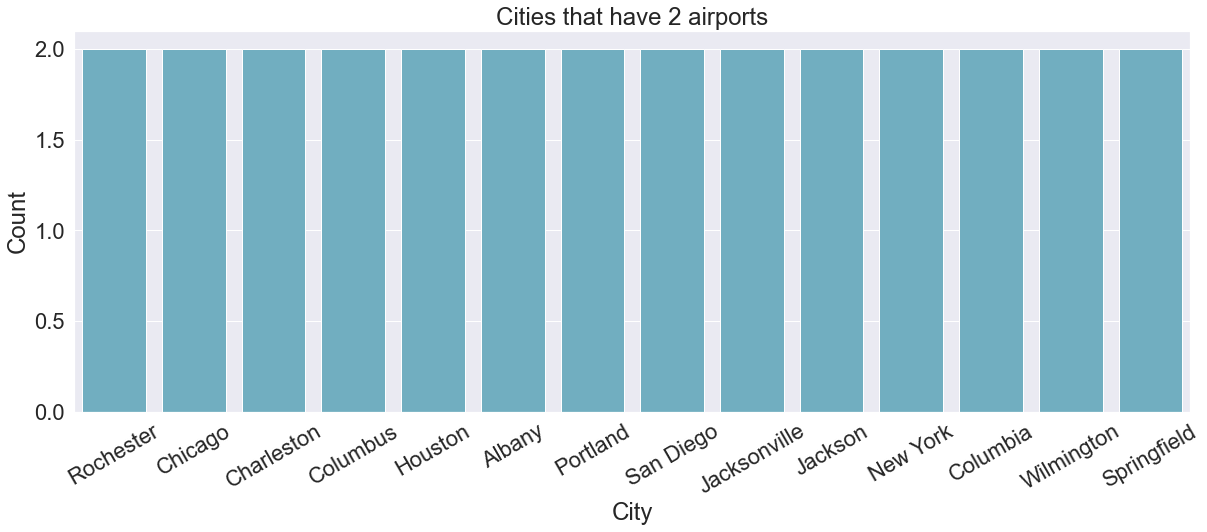

In [43]:
sns.set(font_scale=2, rc={"figure.figsize": (20, 7)}) 
cp = sns.countplot(x="CITY", data=airports, order = airports['CITY'].value_counts()[:14].index, color = 'c') 
plt.xlabel("City")
plt.setp(cp.get_xticklabels(), rotation=30)
plt.ylabel("Count")
plt.title('Cities that have 2 airports')
plt.show()

In [44]:
airports['STATE'].value_counts()

TX    24
CA    22
AK    19
FL    15
MI    15
NY    13
CO    10
MT     8
MN     8
WI     8
NC     8
ND     8
PA     8
GA     7
LA     7
IL     7
VA     7
ID     6
WY     6
HI     5
IA     5
MS     5
OR     5
AL     5
MA     5
UT     5
TN     5
OH     5
MO     5
KY     4
AR     4
KS     4
AZ     4
SC     4
IN     4
WA     4
NM     4
SD     3
NJ     3
NE     3
OK     3
PR     3
NV     3
VI     2
ME     2
CT     1
MD     1
DE     1
NH     1
RI     1
VT     1
GU     1
AS     1
WV     1
Name: STATE, dtype: int64

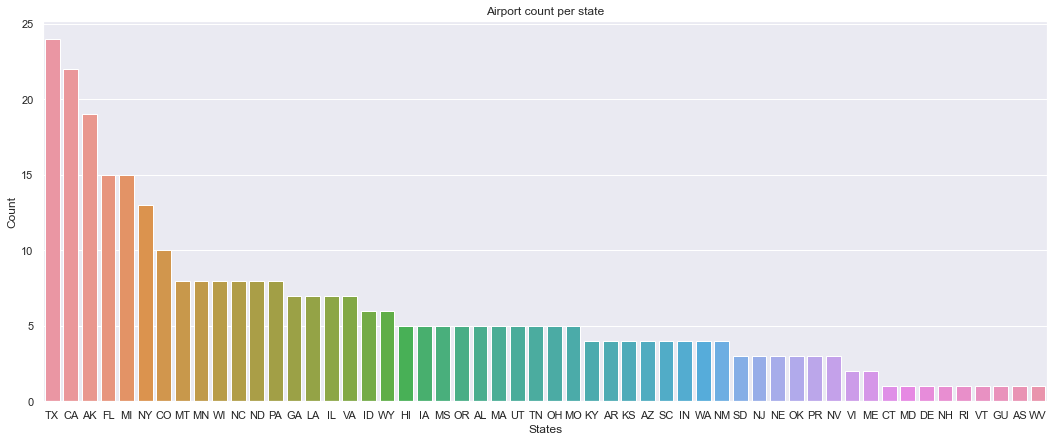

In [45]:
sns.set(font_scale=1, rc={"figure.figsize": (18, 7)}) 
cp = sns.countplot(x="STATE", data=airports, order = airports['STATE'].value_counts().index) 
plt.xlabel("States")
plt.ylabel("Count")
plt.title('Airport count per state')
plt.show()

In [46]:
fig = px.scatter_mapbox(airports, lat="LATITUDE", lon="LONGITUDE", hover_name="CITY", hover_data=["STATE", 'AIRPORT'],
                        color_discrete_sequence=["deeppink"], zoom=3, height=400)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [47]:
fig = px.scatter_mapbox(airports, lat="LATITUDE", lon="LONGITUDE", hover_name="CITY", hover_data=["STATE", 'AIRPORT'],
                        color_discrete_sequence=["deeppink"], zoom=3, height=400)
fig.update_layout(mapbox_style="stamen-terrain")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

# Data visualization - Flights1 dataset

In [48]:
flights1.describe()

MONTH           DAY   DAY_OF_WEEK  SCHEDULED_DEPARTURE  \
count  5.714008e+06  5.714008e+06  5.714008e+06         5.714008e+06   
mean   6.547799e+00  1.570759e+01  3.932643e+00         1.328907e+03   
std    3.397421e+00  8.774394e+00  1.985967e+00         4.835251e+02   
min    1.000000e+00  1.000000e+00  1.000000e+00         1.000000e+00   
25%    4.000000e+00  8.000000e+00  2.000000e+00         9.160000e+02   
50%    7.000000e+00  1.600000e+01  4.000000e+00         1.325000e+03   
75%    9.000000e+00  2.300000e+01  6.000000e+00         1.730000e+03   
max    1.200000e+01  3.100000e+01  7.000000e+00         2.359000e+03   

       DEPARTURE_TIME  DEPARTURE_DELAY      TAXI_OUT    WHEELS_OFF  \
count    5.714008e+06     5.714008e+06  5.714008e+06  5.714008e+06   
mean     1.335066e+03     9.294842e+00  1.606550e+01  1.357099e+03   
std      4.964198e+02     3.688972e+01  8.882449e+00  4.980237e+02   
min      1.000000e+00    -8.200000e+01  1.000000e+00  1.000000e+00   
25%      9.210000e+02    -5.000000e+00  1.100000e+01  9.350000e+02   
50%      1.330000e+03    -2.000000e+00  1.400000e+01  1.343000e+03   
75%      1.740000e+03     7.000000e+00  1.900000e+01  1.754000e+03   
max      2.400000e+03     1.988000e+03  2.250000e+02  2.400000e+03   

       SCHEDULED_TIME  ELAPSED_TIME      AIR_TIME      DISTANCE     WHEELS_ON  \
count    5.714008e+06  5.714008e+06  5.714008e+06  5.714008e+06  5.714008e+06   
mean     1.418940e+02  1.370062e+02  1.135116e+02  8.244569e+02  1.471319e+03   
std      7.531400e+01  7.421107e+01  7.223082e+01  6.086620e+02  5.218682e+02   
min      1.800000e+01  1.400000e+01  7.000000e+00  3.100000e+01  1.000000e+00   
25%      8.500000e+01  8.200000e+01  6.000000e+01  3.730000e+02  1.054000e+03   
50%      1.230000e+02  1.180000e+02  9.400000e+01  6.500000e+02  1.508000e+03   
75%      1.740000e+02  1.680000e+02  1.440000e+02  1.065000e+03  1.911000e+03   
max      7.180000e+02  7.660000e+02  6.900000e+02  4.983000e+03  2.400000e+03   

            TAXI_IN  SCHEDULED_ARRIVAL  ARRIVAL_TIME  ARRIVAL_DELAY  \
count  5.714008e+06       5.714008e+06  5.714008e+06   5.714008e+06   
mean   7.429063e+00       1.493187e+03  1.476373e+03   4.407057e+00   
std    5.618951e+00       5.069011e+02  5.259730e+02   3.927130e+01   
min    1.000000e+00       1.000000e+00  1.000000e+00  -8.700000e+01   
25%    4.000000e+00       1.110000e+03  1.058000e+03  -1.300000e+01   
50%    6.000000e+00       1.520000e+03  1.512000e+03  -5.000000e+00   
75%    9.000000e+00       1.917000e+03  1.916000e+03   8.000000e+00   
max    2.480000e+02       2.400000e+03  2.400000e+03   1.971000e+03   

        DIVERTED  CANCELLED  
count  5714008.0  5714008.0  
mean         0.0        0.0  
std          0.0        0.0  
min          0.0        0.0  
25%          0.0        0.0  
50%          0.0        0.0  
75%          0.0        0.0  
max          0.0        0.0

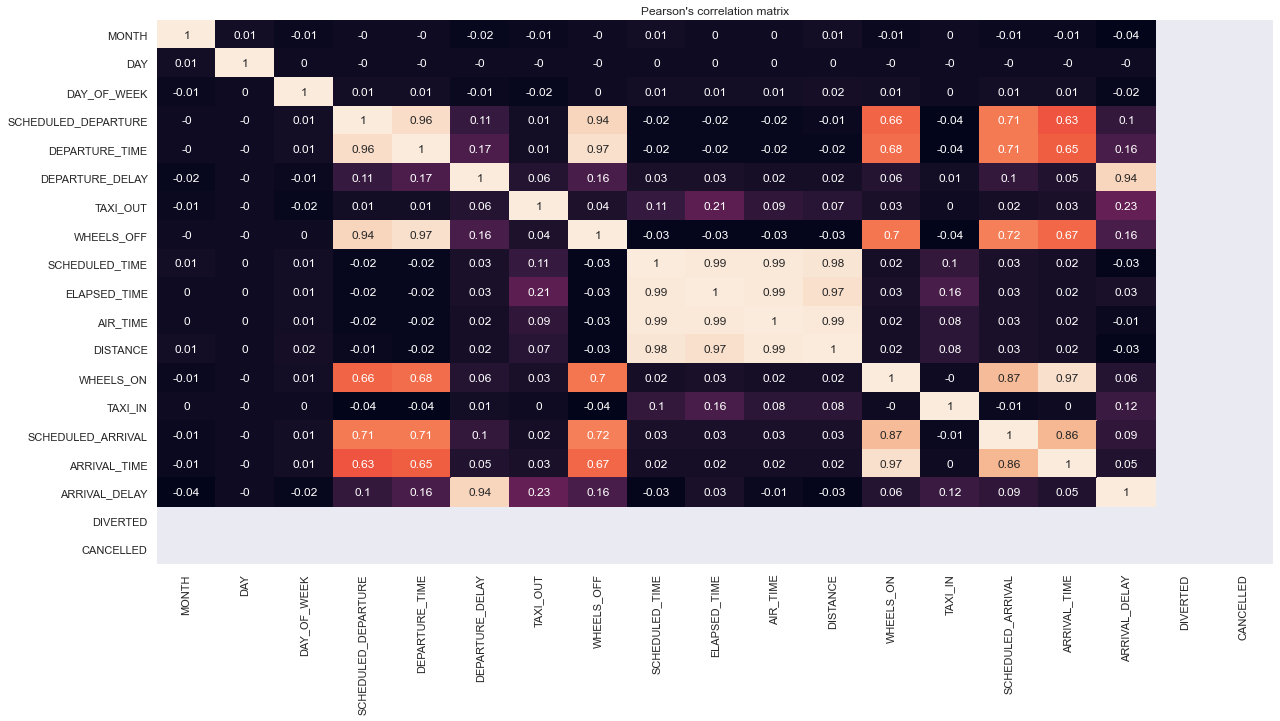

In [49]:
corr_matrix = flights1.corr().round(decimals=2)
plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix, annot=True, cbar=False)
plt.title("Pearson's correlation matrix")
plt.show()

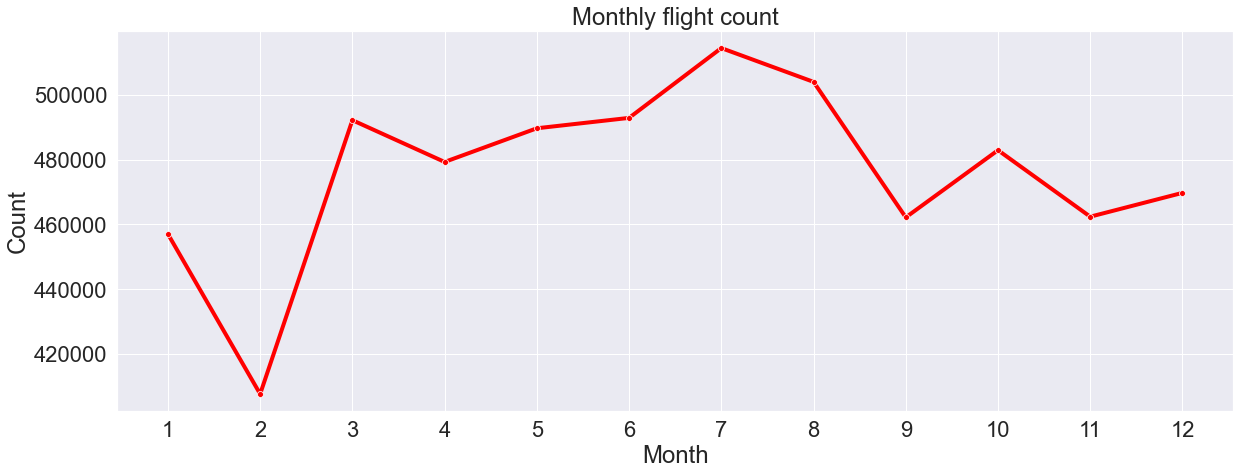

In [50]:
sns.set(font_scale=2, rc={"figure.figsize": (20, 7)}) 
sns.lineplot(data = flights1['MONTH'].value_counts(), marker='o', color="red", linewidth=4.0)
plt.xlabel("Month")
plt.ylabel("Count")
plt.title('Monthly flight count')
plt.xticks(np.arange(1,13,1))
plt.show()

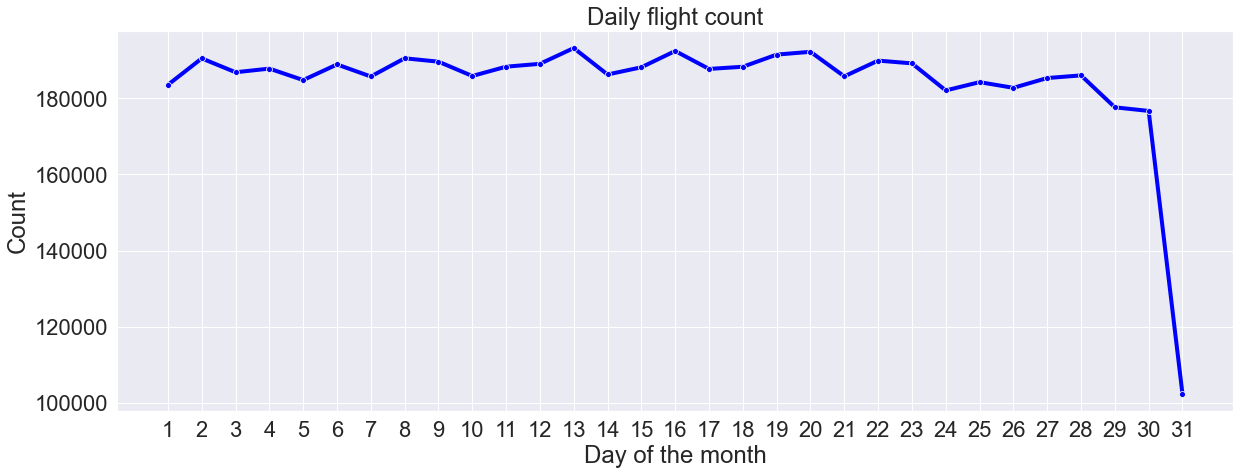

In [51]:
sns.set(font_scale=2, rc={"figure.figsize": (20, 7)}) 
sns.lineplot(data = flights1['DAY'].value_counts(), marker='o', color="blue", linewidth=4.0)
plt.xlabel("Day of the month")
plt.ylabel("Count")
plt.title('Daily flight count')
plt.xticks(np.arange(1,32,1))
plt.show()

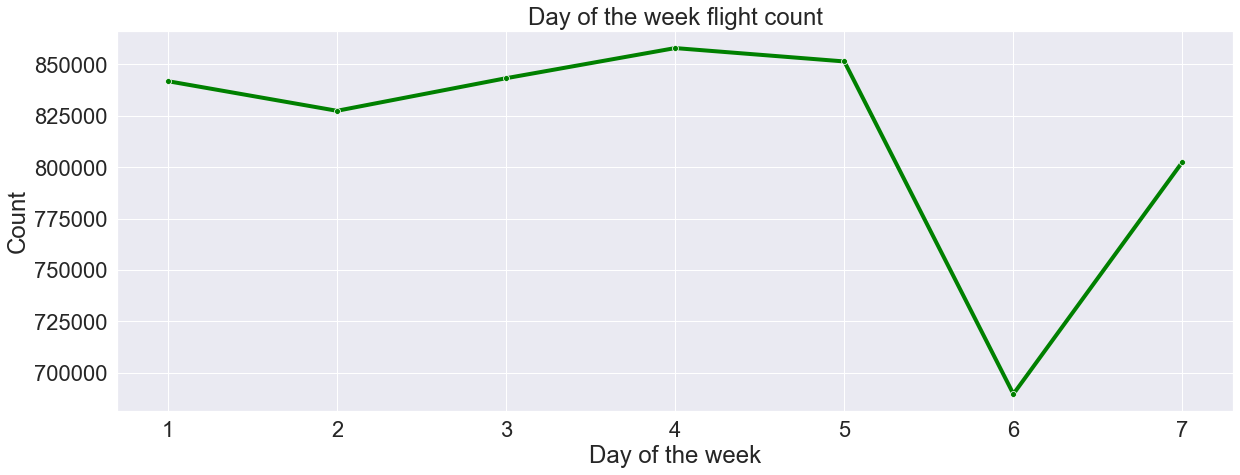

In [52]:
sns.set(font_scale=2, rc={"figure.figsize": (20, 7)}) 
sns.lineplot(data = flights1['DAY_OF_WEEK'].value_counts(), marker='o', color="green", linewidth=4.0)
plt.xlabel("Day of the week")
plt.ylabel("Count")
plt.title('Day of the week flight count')
plt.xticks(np.arange(1,8,1))
plt.show()

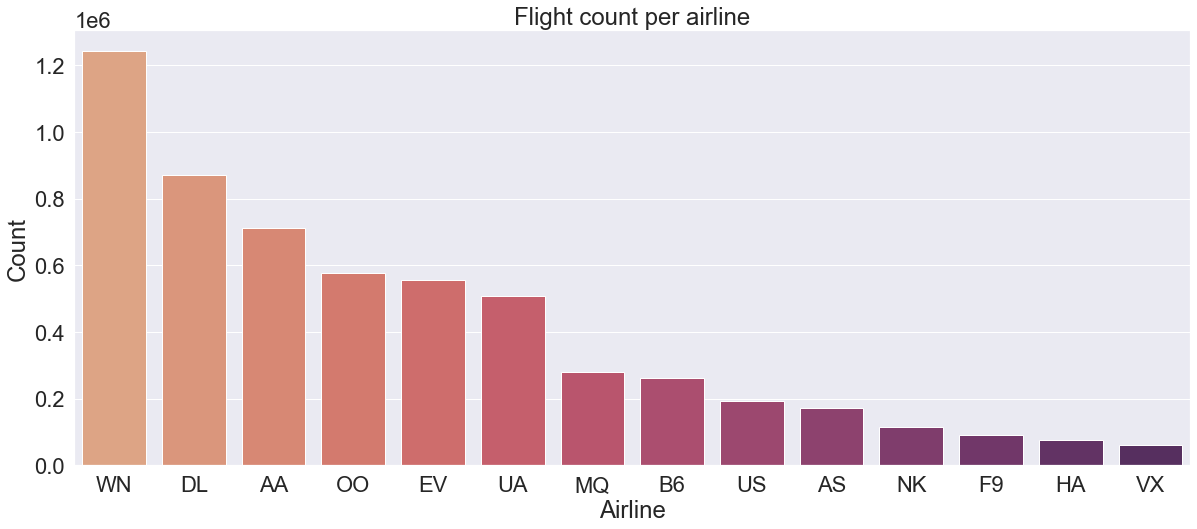

In [53]:
sns.set(font_scale=2, rc={"figure.figsize": (20, 8)}) 
sns.countplot(x="AIRLINE", data=flights1, palette="flare", order = flights1['AIRLINE'].value_counts().index)
plt.xlabel("Airline")
plt.ylabel("Count")
plt.title('Flight count per airline')
plt.show()

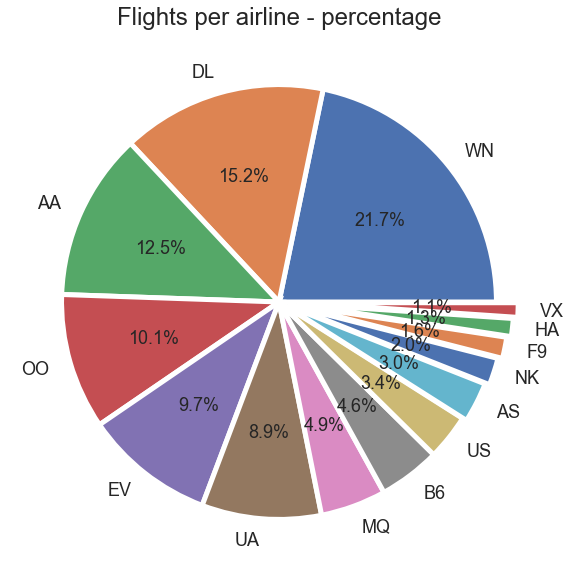

In [54]:
labele = list(flights1['AIRLINE'].value_counts().index)
myExplode = [0,0,0,0,0,0,0,0,0,0.02,0.04,0.06,0.08,0.1]
plt.figure(figsize=(17,10))
plt.pie(flights1['AIRLINE'].value_counts(), autopct = '%.1f%%', labels = labele,explode = myExplode, textprops={'fontsize': 18}, wedgeprops={'linewidth': 5.0, 'edgecolor': 'white'})
plt.title("Flights per airline - percentage")
plt.show()

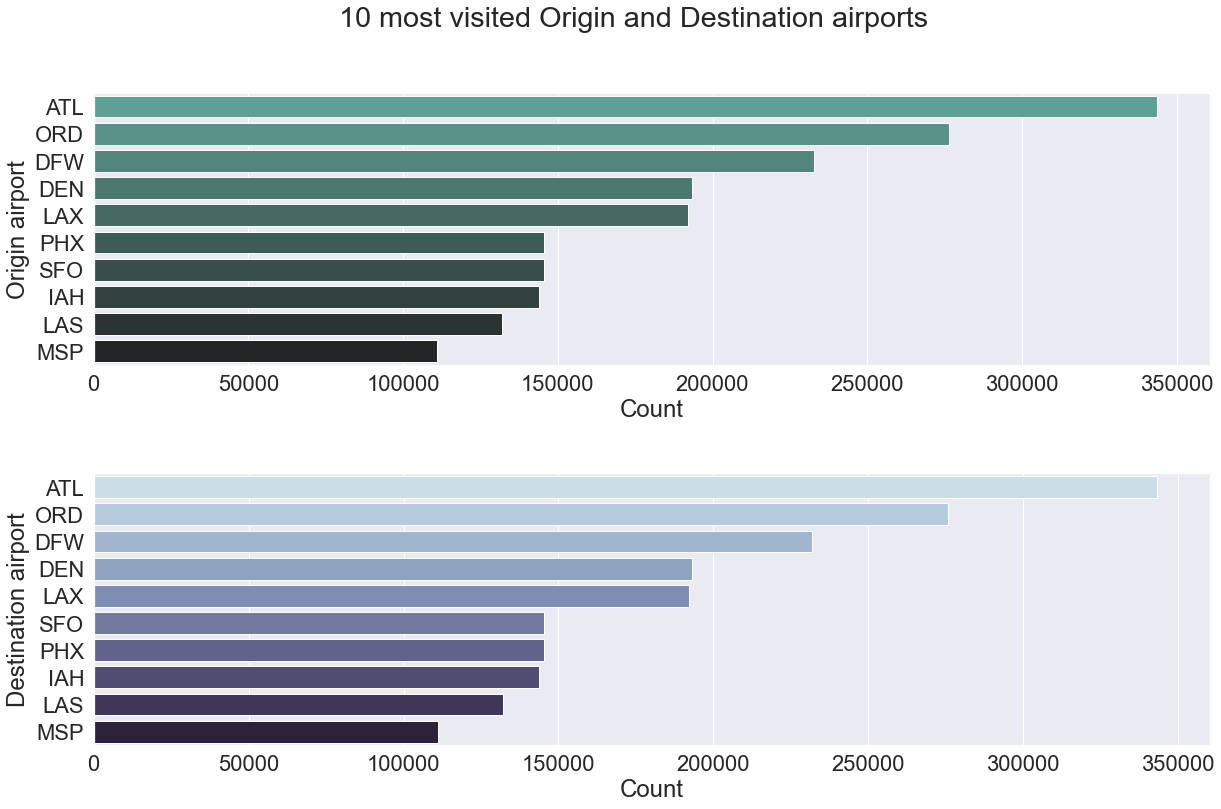

In [55]:
plt.figure(figsize=(20, 12))

plt.subplot(211)
sns.countplot(y="ORIGIN_AIRPORT", data=flights1, palette="dark:#5A9_r", order = flights1['ORIGIN_AIRPORT'].value_counts()[:10].index)
plt.xlabel("Count")
plt.ylabel("Origin airport")

plt.subplots_adjust(wspace=0.4, hspace=0.4)

plt.subplot(212) 
sns.countplot(y="DESTINATION_AIRPORT", data=flights1, palette="ch:s=.25,rot=-.25", order = flights1['DESTINATION_AIRPORT'].value_counts()[:10].index)
plt.xlabel("Count")
plt.ylabel("Destination airport")

plt.suptitle('10 most visited Origin and Destination airports')
plt.show()

In [56]:
df = pd.merge(flights1, airports[['IATA_CODE','AIRPORT','CITY', 'LATITUDE', 'LONGITUDE']], left_on='ORIGIN_AIRPORT', right_on = 'IATA_CODE')
df = df.drop(['IATA_CODE'], axis=1)
df = pd.merge(df,airports[['IATA_CODE','AIRPORT','CITY', 'LATITUDE', 'LONGITUDE']], left_on='DESTINATION_AIRPORT', right_on = 'IATA_CODE')
df = df.drop(['IATA_CODE'], axis=1)
df

MONTH  DAY  DAY_OF_WEEK AIRLINE ORIGIN_AIRPORT DESTINATION_AIRPORT  \
0            1    1            4      AS            ANC                 SEA   
1            1    1            4      AS            ANC                 SEA   
2            1    1            4      DL            ANC                 SEA   
3            1    1            4      AS            ANC                 SEA   
4            1    1            4      AS            ANC                 SEA   
...        ...  ...          ...     ...            ...                 ...   
5221995     12   29            2      OO            JMS                 DVL   
5221996     12   30            3      OO            JMS                 DVL   
5221997     12   30            3      OO            JMS                 DVL   
5221998     12   31            4      OO            JMS                 DVL   
5221999     12   31            4      OO            JMS                 DVL   

         SCHEDULED_DEPARTURE  DEPARTURE_TIME  DEPARTURE_DELAY  TAXI_OUT  ...  \
0                          5          2354.0            -11.0      21.0  ...   
1                         45            41.0             -4.0      17.0  ...   
2                         45            31.0            -14.0      25.0  ...   
3                        155           140.0            -15.0      17.0  ...   
4                        220           209.0            -11.0      15.0  ...   
...                      ...             ...              ...       ...  ...   
5221995                 2356          2335.0            -21.0      18.0  ...   
5221996                 1431          1419.0            -12.0      12.0  ...   
5221997                 2356          2323.0            -33.0      22.0  ...   
5221998                 1431          1431.0              0.0      33.0  ...   
5221999                 2245          2227.0            -18.0       9.0  ...   

         DIVERTED  CANCELLED                                    AIRPORT_x  \
0               0          0  Ted Stevens Anchorage International Airport   
1               0          0  Ted Stevens Anchorage International Airport   
2               0          0  Ted Stevens Anchorage International Airport   
3               0          0  Ted Stevens Anchorage International Airport   
4               0          0  Ted Stevens Anchorage International Airport   
...           ...        ...                                          ...   
5221995         0          0                   Jamestown Regional Airport   
5221996         0          0                   Jamestown Regional Airport   
5221997         0          0                   Jamestown Regional Airport   
5221998         0          0                   Jamestown Regional Airport   
5221999         0          0                   Jamestown Regional Airport   

            CITY_x  LATITUDE_x  LONGITUDE_x  \
0        Anchorage    61.17432   -149.99619   
1        Anchorage    61.17432   -149.99619   
2        Anchorage    61.17432   -149.99619   
3        Anchorage    61.17432   -149.99619   
4        Anchorage    61.17432   -149.99619   
...            ...         ...          ...   
5221995  Jamestown    46.92972    -98.67820   
5221996  Jamestown    46.92972    -98.67820   
5221997  Jamestown    46.92972    -98.67820   
5221998  Jamestown    46.92972    -98.67820   
5221999  Jamestown    46.92972    -98.67820   

                                    AIRPORT_y       CITY_y  LATITUDE_y  \
0        Seattle-Tacoma International Airport      Seattle    47.44898   
1        Seattle-Tacoma International Airport      Seattle    47.44898   
2        Seattle-Tacoma International Airport      Seattle    47.44898   
3        Seattle-Tacoma International Airport      Seattle    47.44898   
4        Seattle-Tacoma International Airport      Seattle    47.44898   
...                                       ...          ...         ...   
5221995          Devils Lake Regional Airport  Devils Lake    48.11425   
5221996          

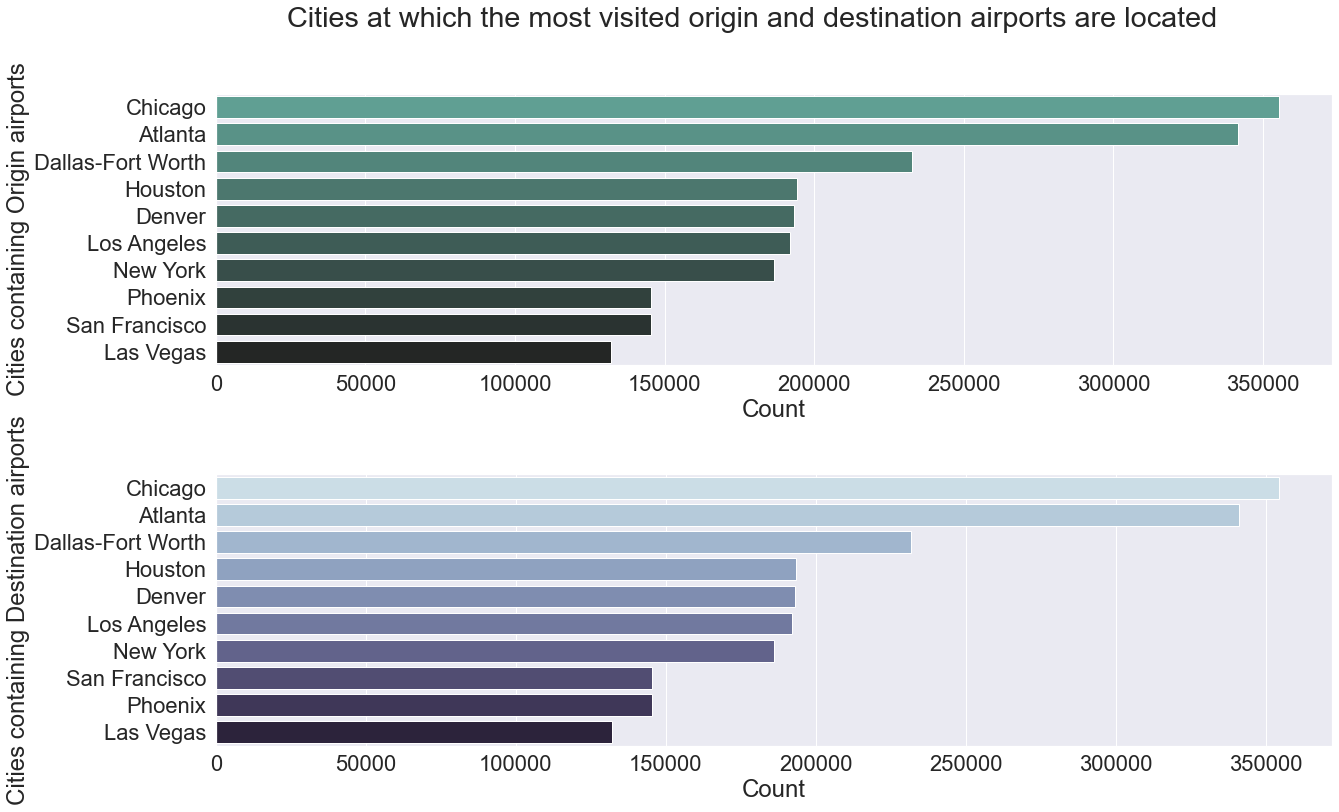

In [57]:
sns.set(font_scale=2, rc={"figure.figsize": (20, 12)})

plt.subplot(211)
sns.countplot(y="CITY_x", data=df, palette="dark:#5A9_r", order = df['CITY_x'].value_counts()[:10].index)
plt.xlabel("Count")
plt.ylabel("Cities containing Origin airports")

plt.subplots_adjust(wspace=0.4, hspace=0.4)

plt.subplot(212)
sns.countplot(y="CITY_y", data=df, palette="ch:s=.25,rot=-.25", order = df['CITY_y'].value_counts()[:10].index)
plt.xlabel("Count")
plt.ylabel("Cities containing Destination airports")

plt.suptitle('Cities at which the most visited origin and destination airports are located ')
plt.show()

In [58]:
city_od = []
latitude_od =[]
longitude_od = []
airport_od = []

for i in (df['ORIGIN_AIRPORT'].value_counts()[:10].index):
    LAT =df.loc[(df['ORIGIN_AIRPORT'] == i)]['LATITUDE_x']
    la = LAT.unique()
    l1 = la[0]
    latitude_od.append(l1)
    
    LON = df.loc[(df['ORIGIN_AIRPORT'] == i)]['LONGITUDE_x']
    lo = LON.unique()
    l2 = lo[0]
    longitude_od.append(l2)
    
    CITY = df.loc[(df['ORIGIN_AIRPORT'] == i)]['CITY_x']
    ci = CITY.unique()
    c = ci[0]
    city_od.append(c)
    
    AIR = df.loc[(df['ORIGIN_AIRPORT'] == i)]['AIRPORT_x']
    air = AIR.unique()
    a = air[0]
    airport_od.append(a)

In [59]:
df_top_10 = pd.DataFrame(df['ORIGIN_AIRPORT'].value_counts()[:10].index,columns = ['airport_code'])
df_top_10['city_od'] = city_od
df_top_10['airport_od'] = airport_od
df_top_10['latitude_od'] = latitude_od
df_top_10['longitude_od'] = longitude_od
df_top_10

airport_code            city_od  \
0          ATL            Atlanta   
1          ORD            Chicago   
2          DFW  Dallas-Fort Worth   
3          DEN             Denver   
4          LAX        Los Angeles   
5          PHX            Phoenix   
6          SFO      San Francisco   
7          IAH            Houston   
8          LAS          Las Vegas   
9          MSP        Minneapolis   

                                         airport_od  latitude_od  longitude_od  
0  Hartsfield-Jackson Atlanta International Airport     33.64044     -84.42694  
1              Chicago O'Hare International Airport     41.97960     -87.90446  
2           Dallas/Fort Worth International Airport     32.89595     -97.03720  
3                      Denver International Airport     39.85841    -104.66700  
4                 Los Angeles International Airport     33.94254    -118.40807  
5          Phoenix Sky Harbor International Airport     33.43417    -112.00806  
6               San Francisco International Airport     37.61900    -122.37484  
7              George Bush Intercontinental Airport     29.98047     -95.33972  
8                    McCarran International Airport     36.08036    -115.15233  
9      Minneapolis-Saint Paul International Airport     44.88055     -93.21692

In [60]:
fig = px.scatter_mapbox(df_top_10, lat="latitude_od", lon="longitude_od", hover_name="airport_od", hover_data=["city_od", 'airport_code'],
                        color_discrete_sequence=["blue"], zoom=3, height=400)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [61]:
sempl_100 = df.sample(n = 100)
sempl_100 = sempl_100.reset_index()
sempl_100 = sempl_100.drop('index', axis = 1)

In [62]:
fig = go.Figure()

fig.add_trace(go.Scattergeo(
    locationmode = 'USA-states',
    lon = airports['LONGITUDE'],
    lat = airports['LATITUDE'],
    hoverinfo = 'text',
    text = airports['AIRPORT'],
    mode = 'markers',
    marker = dict(
        size = 2,
        color = 'rgb(255, 0, 0)',
        line = dict(
            width = 3,
            color = 'rgba(68, 68, 68, 0)'
        )
    )))

for i in range(len(sempl_100)):
    fig.add_trace(
        go.Scattergeo(
            locationmode = 'USA-states',
            lon = [sempl_100['LONGITUDE_x'][i], sempl_100['LONGITUDE_y'][i]],
            lat = [sempl_100['LATITUDE_x'][i], sempl_100['LATITUDE_y'][i]],
            mode = 'lines',
            line = dict(width = 1,color = 'red')
        )
    )
fig.update_layout(
    title_text = '100 randomly chosen flight paths from Origin airport to Destination airport',
    showlegend = False,
    geo = dict(
        scope = 'north america',
        projection_type = 'azimuthal equal area',
        showland = True,
        landcolor = 'rgb(243, 243, 243)',
        countrycolor = 'rgb(204, 204, 204)',
    ),
)

fig.show()

In [63]:
sempl_1000= df.sample(n = 1000)
sempl_1000= sempl_1000.reset_index()
sempl_1000= sempl_1000.drop('index', axis = 1)

In [64]:
fig = go.Figure()

fig.add_trace(go.Scattergeo(
    locationmode = 'USA-states',
    lon = airports['LONGITUDE'],
    lat = airports['LATITUDE'],
    hoverinfo = 'text',
    text = airports['AIRPORT'],
    mode = 'markers',
    marker = dict(
        size = 2,
        color = 'rgb(255, 0, 0)',
        line = dict(
            width = 3,
            color = 'rgba(68, 68, 68, 0)'
        )
    )))

for i in range(len(sempl_1000)):
    fig.add_trace(
        go.Scattergeo(
            locationmode = 'USA-states',
            lon = [sempl_1000['LONGITUDE_x'][i], sempl_1000['LONGITUDE_y'][i]],
            lat = [sempl_1000['LATITUDE_x'][i], sempl_1000['LATITUDE_y'][i]],
            mode = 'lines',
            line = dict(width = 1,color = 'red')
        )
    )
fig.update_layout(
    title_text = '1000 randomly chosen flight paths from Origin airport to Destination airport',
    showlegend = False,
    geo = dict(
        scope = 'north america',
        projection_type = 'azimuthal equal area',
        showland = True,
        landcolor = 'rgb(243, 243, 243)',
        countrycolor = 'rgb(204, 204, 204)',
    ),
)

fig.show()

In [65]:
origin_destination_pairs = []

for i in range(flights1.shape[0]):
    origin = flights1['ORIGIN_AIRPORT'][i]
    destination = flights1['DESTINATION_AIRPORT'][i]
    
    origin_destination = (origin,destination)
    origin_destination_pairs.append(origin_destination)

In [66]:
flights1['origin_destination_pairs'] = origin_destination_pairs

In [67]:
flights1['origin_destination_pairs'].value_counts()

(SFO, LAX)        13400
(LAX, SFO)        13109
(JFK, LAX)        11853
(LAX, JFK)        11851
(LAS, LAX)         9651
                  ...  
(MSN, SFO)            1
(OKC, MIA)            1
(RDU, PHF)            1
(15024, 12264)        1
(11433, 10874)        1
Name: origin_destination_pairs, Length: 8570, dtype: int64

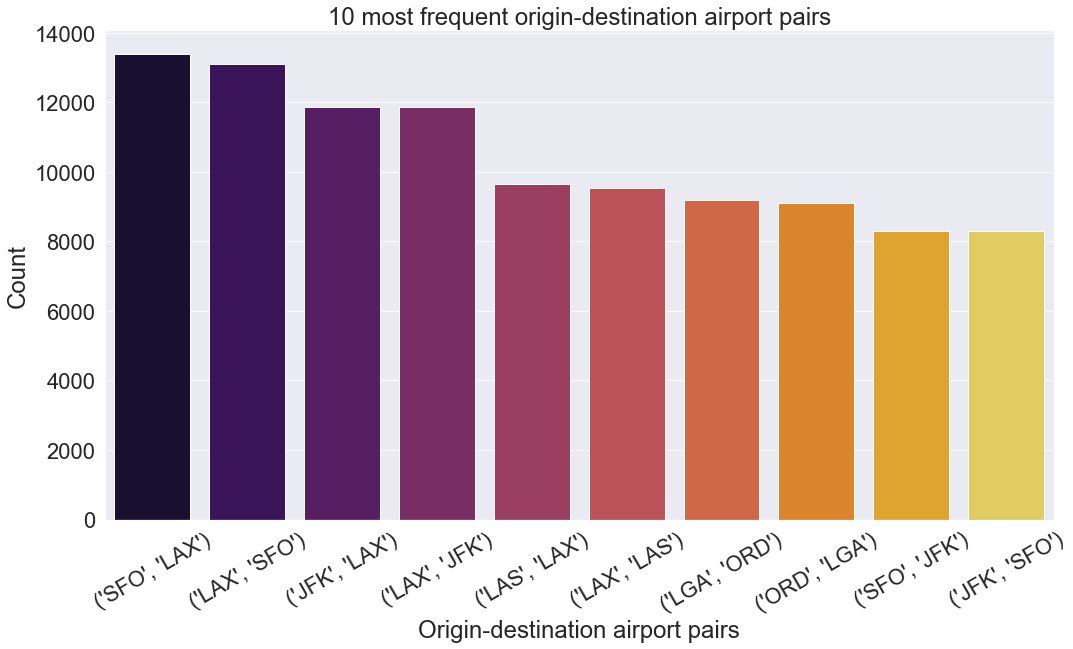

In [68]:
sns.set(font_scale=2, rc={"figure.figsize": (17, 9)}) 
cp = sns.countplot(x="origin_destination_pairs", data=flights1,palette='inferno', order = flights1['origin_destination_pairs'].value_counts()[:10].index)
plt.xlabel("Origin-destination airport pairs")
plt.setp(cp.get_xticklabels(), rotation=30)
plt.ylabel("Count")
plt.title('10 most frequent origin-destination airport pairs')
plt.show()

In [69]:
airports.loc[airports['IATA_CODE'] == 'SFO']

IATA_CODE                              AIRPORT           CITY STATE  \
278       SFO  San Francisco International Airport  San Francisco    CA   

     LATITUDE  LONGITUDE  
278    37.619 -122.37484

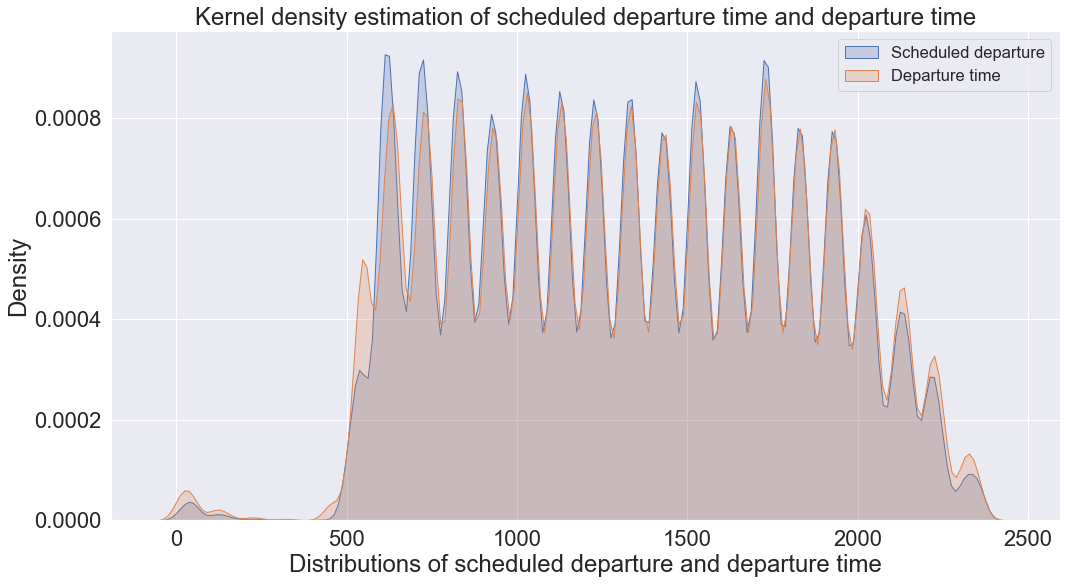

In [70]:
plt.title('Kernel density estimation of scheduled departure time and departure time')
sns.set(font_scale=1.5, rc={"figure.figsize": (17, 9)})
sns.kdeplot(flights1['SCHEDULED_DEPARTURE'], shade=True, label = 'Scheduled departure')
sns.kdeplot(flights1['DEPARTURE_TIME'], shade=True, label = 'Departure time')
plt.xlabel('Distributions of scheduled departure and departure time')
plt.legend(loc = 'upper right')
plt.show()

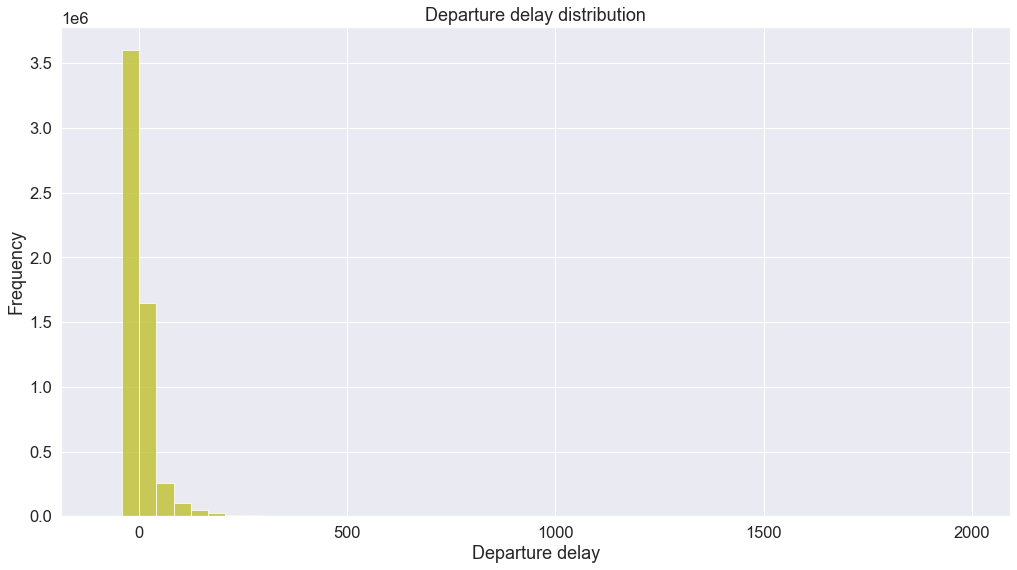

In [71]:
plt.hist(flights1['DEPARTURE_DELAY'], 50, facecolor='tab:olive', alpha=0.75)   
plt.xlabel('Departure delay')
plt.ylabel('Frequency')
plt.title('Departure delay distribution')
plt.grid(True)
plt.show()

In [72]:
departure_result = []
departure_delay = [] #yes,no

for i in flights1['DEPARTURE_DELAY']:
    if i>0:
        departure_delay.append('yes')
        
        if 15>i>0:
            departure_result.append('d_delay < 15')
            
        elif 45>i>=15:
            departure_result.append('15 <= d_delay < 45')
            
        elif i>=45:
            departure_result.append('45 <= d_delay')
            
    elif i==0:
        departure_delay.append('no')
        departure_result.append('flight on time')
        
    else:
        departure_delay.append('no')
        departure_result.append('flight left earlier')

In [73]:
flights1['Departure_result'] = departure_result
flights1['Departure_result'].value_counts()

flight left earlier    3270517
d_delay < 15           1064627
15 <= d_delay < 45      600421
45 <= d_delay           450001
flight on time          328442
Name: Departure_result, dtype: int64

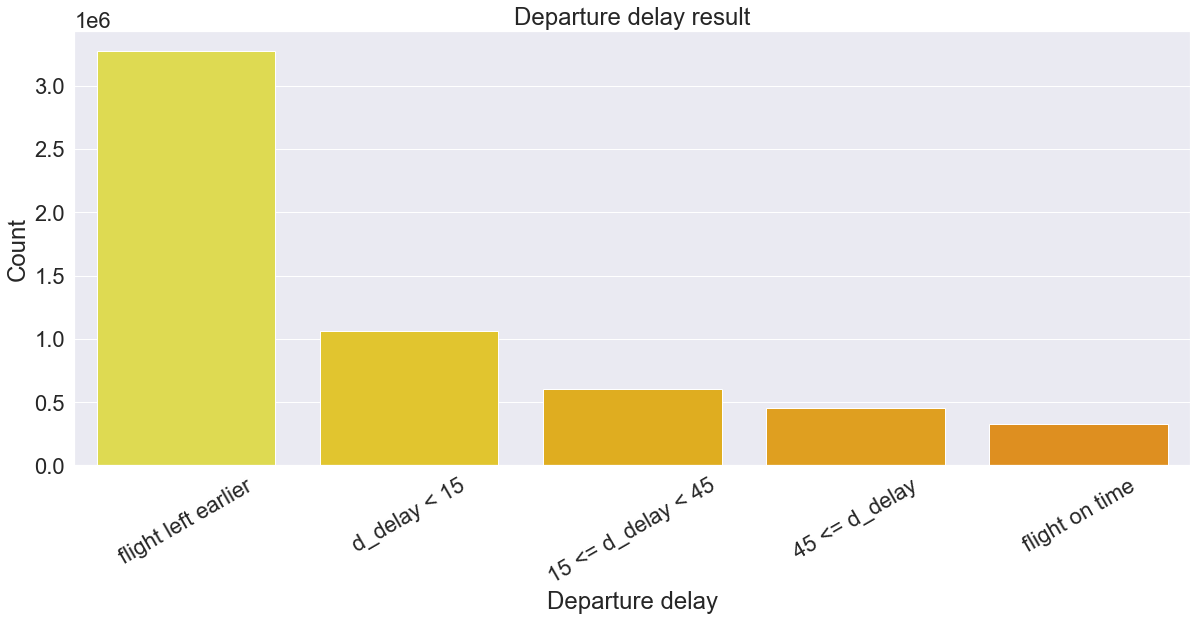

In [74]:
sns.set(font_scale=2, rc={"figure.figsize": (20, 8)}) 
cp = sns.countplot(x="Departure_result", data=flights1, palette='Wistia', order = flights1['Departure_result'].value_counts().index)
plt.xlabel("Departure delay")
plt.setp(cp.get_xticklabels(), rotation=30)
plt.ylabel("Count")
plt.title('Departure delay result')
plt.show()

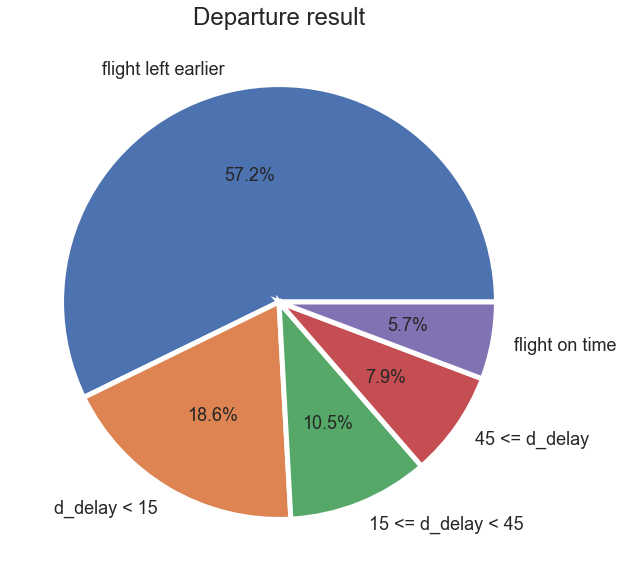

In [75]:
plt.figure(figsize=(17,10))
labele = list(flights1['Departure_result'].value_counts().index)
plt.pie(flights1['Departure_result'].value_counts(), autopct = '%.1f%%', labels = labele, textprops={'fontsize': 18}, wedgeprops={'linewidth': 5.0, 'edgecolor': 'white'})
plt.title("Departure result")
plt.show()

In [76]:
flights1['departure_delay'] = departure_delay
flights1['departure_delay'].value_counts()

no     3598959
yes    2115049
Name: departure_delay, dtype: int64

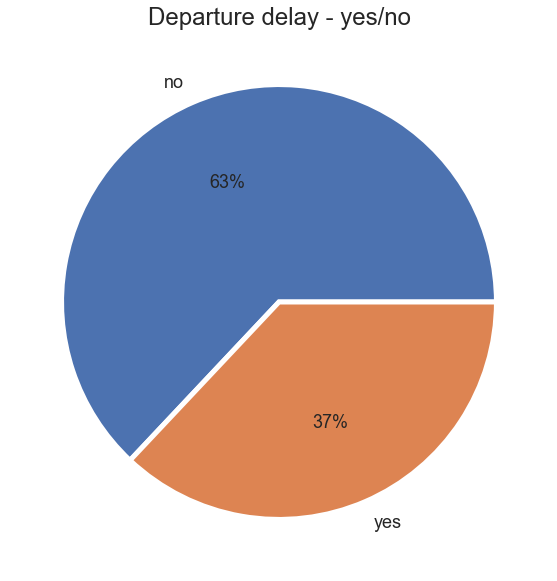

In [77]:
plt.figure(figsize=(17,10))
labele = list(flights1['departure_delay'].value_counts().index)
plt.pie(flights1['departure_delay'].value_counts(), autopct = '%.f%%', labels = labele, textprops={'fontsize': 18}, wedgeprops={'linewidth': 5.0, 'edgecolor': 'white'})
plt.title("Departure delay - yes/no")
plt.show()

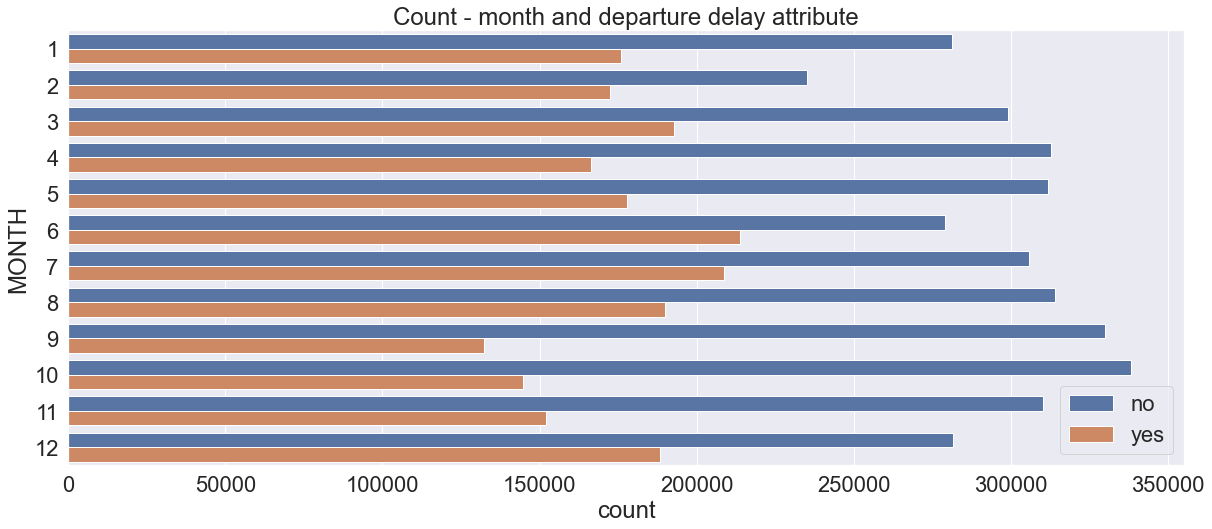

In [78]:
plt.figure(figsize=(20,8))
sns.countplot(y="MONTH", hue="departure_delay", data=flights1) 
plt.title('Count - month and departure delay attribute')
plt.legend(loc = 'lower right')
plt.show()

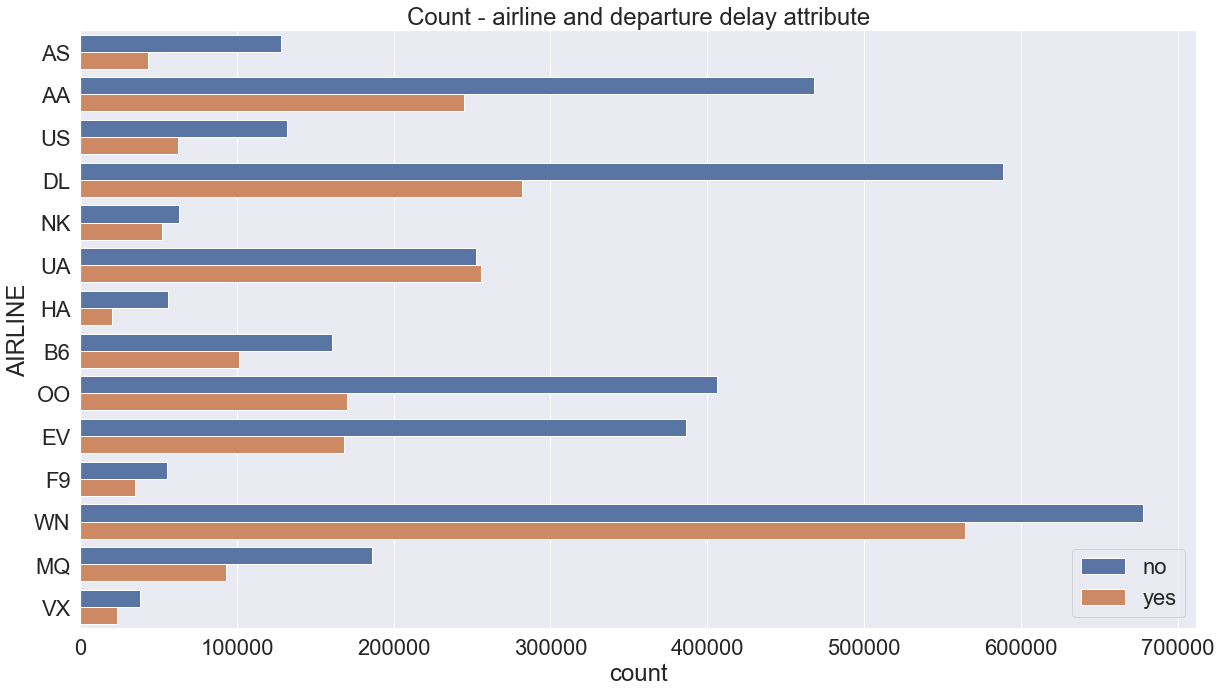

In [79]:
plt.figure(figsize=(20,11))
sns.countplot(y="AIRLINE", hue="departure_delay", data=flights1) 
plt.title('Count - airline and departure delay attribute')
plt.legend(loc = 'lower right')
plt.show()

In [80]:
f = flights1.loc[flights1['departure_delay'] == 'yes']
f['origin_destination_pairs'].value_counts()

(LAX, SFO)        5997
(SFO, LAX)        5549
(LAX, JFK)        4484
(ORD, LAX)        4400
(ORD, SFO)        4275
                  ... 
(TTN, STL)           1
(10529, 11193)       1
(11278, 14321)       1
(CVG, BDL)           1
(12264, 13244)       1
Name: origin_destination_pairs, Length: 8464, dtype: int64

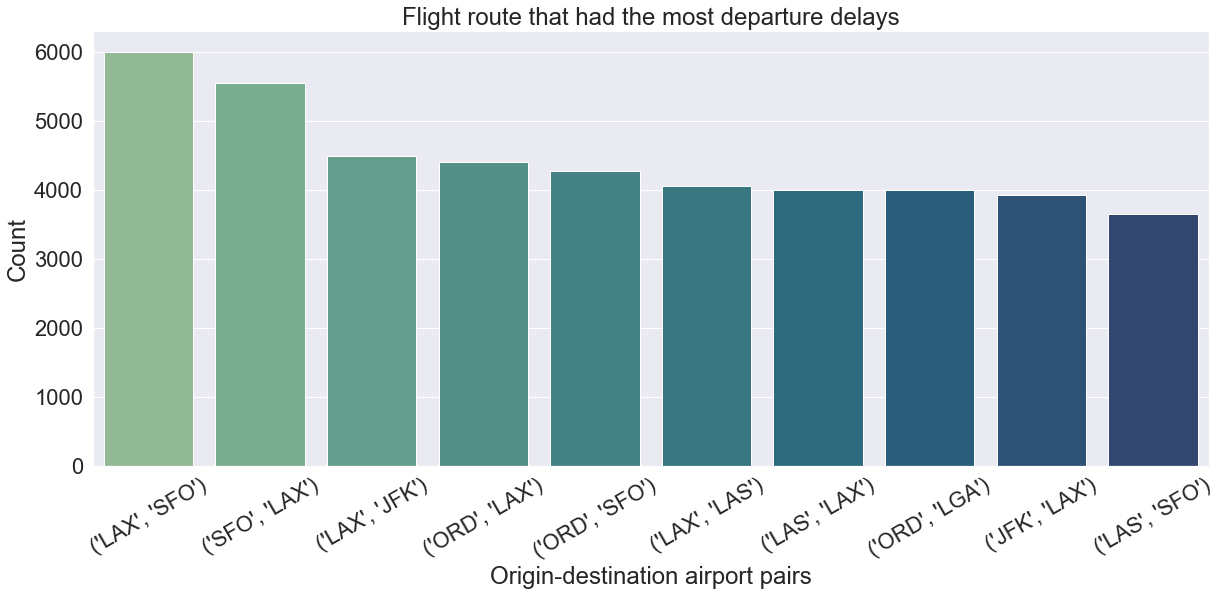

In [81]:
sns.set(font_scale=2, rc={"figure.figsize": (20, 8)}) 
cp = sns.countplot(x="origin_destination_pairs", data=f, palette='crest', order = f['origin_destination_pairs'].value_counts()[:10].index)
plt.xlabel("Origin-destination airport pairs")
plt.setp(cp.get_xticklabels(), rotation=30)
plt.ylabel("Count")
plt.title('Flight route that had the most departure delays')
plt.show()

In [82]:
lat_x = df['LATITUDE_x'].loc[df['ORIGIN_AIRPORT'] == 'LAX'].unique()
lon_x = df['LONGITUDE_x'].loc[df['ORIGIN_AIRPORT'] == 'LAX'].unique()

lat_y = df['LATITUDE_y'].loc[df['DESTINATION_AIRPORT'] == 'SFO'].unique()
lon_y = df['LONGITUDE_y'].loc[df['DESTINATION_AIRPORT'] == 'SFO'].unique()

lat_dd = pd.Series([lat_x[0], lat_y[0]])
lon_dd = pd.Series([lon_x[0], lon_y[0]])

In [83]:
short_df = pd.DataFrame(['LAX', 'SFO'], columns = ['airport'])
short_df['latitude'] = lat_dd
short_df['longitude'] = lon_dd
short_df

airport  latitude  longitude
0     LAX  33.94254 -118.40807
1     SFO  37.61900 -122.37484

In [84]:
fig = go.Figure()

fig.add_trace(go.Scattergeo(
    locationmode = 'USA-states',
    lon = short_df['longitude'],
    lat = short_df['latitude'],
    mode="lines+markers+text",
    name="Lines, Markers and Text",
    text=["LAX", "SFO"],
    textposition="top right",
    marker = dict(
        size = 2,
        color = 'rgb(255, 0, 0)',
        line = dict(
            width = 3,
            color = 'rgba(68, 68, 68, 0)'
        )
    )))
fig.add_trace(
        go.Scattergeo(
            locationmode = 'USA-states',
            lon = [short_df['longitude'][0], short_df['longitude'][1]],
            lat = [short_df['latitude'][0], short_df['latitude'][1]],
            mode = 'lines',
            line = dict(width = 1,color = 'red')
        )
    )
fig.update_layout(
    title_text = 'The flight path between airports with the most departure delays',
    showlegend = False,
    geo = dict(
        scope = 'north america',
        projection_type = 'azimuthal equal area',
        showland = True,
        landcolor = 'rgb(243, 243, 243)',
        countrycolor = 'rgb(204, 204, 204)',
    ),
)

fig.show()

In [85]:
maks_ddelay = flights1['DEPARTURE_DELAY'].max()
flights1['origin_destination_pairs'].loc[flights1['DEPARTURE_DELAY'] == maks_ddelay].values

array([('BHM', 'DFW')], dtype=object)

In [86]:
print('The longest departure delay was' , maks_ddelay, 'minutes.')

The longest departure delay was 1988.0 minutes.


In [87]:
airports.loc[airports['IATA_CODE'] == 'DFW']

IATA_CODE                                  AIRPORT               CITY  \
86       DFW  Dallas/Fort Worth International Airport  Dallas-Fort Worth   

   STATE  LATITUDE  LONGITUDE  
86    TX  32.89595   -97.0372

In [88]:
lat_x2 = df['LATITUDE_x'].loc[df['ORIGIN_AIRPORT'] == 'BHM'].unique()
lon_x2 = df['LONGITUDE_x'].loc[df['ORIGIN_AIRPORT'] == 'BHM'].unique()

lat_y2 = df['LATITUDE_y'].loc[df['DESTINATION_AIRPORT'] == 'DFW'].unique()
lon_y2 = df['LONGITUDE_y'].loc[df['DESTINATION_AIRPORT'] == 'DFW'].unique()

lat_dd_max = pd.Series([lat_x2[0], lat_y2[0]])
lon_dd_max = pd.Series([lon_x2[0], lon_y2[0]])

In [89]:
short_df2 = pd.DataFrame(['BHM', 'DFW'], columns = ['airport'])
short_df2['latitude'] = lat_dd_max
short_df2['longitude'] = lon_dd_max
short_df2

airport  latitude  longitude
0     BHM  33.56294  -86.75355
1     DFW  32.89595  -97.03720

In [90]:
fig = go.Figure()

fig.add_trace(go.Scattergeo(
    locationmode = 'USA-states',
    lon = short_df2['longitude'],
    lat = short_df2['latitude'],
    mode="lines+markers+text",
    name="Lines, Markers and Text",
    text=["BHM", "DFW"],
    textposition="top right",
    marker = dict(
        size = 2,
        color = 'rgb(255, 0, 0)',
        line = dict(
            width = 3,
            color = 'rgba(68, 68, 68, 0)'
        )
    )))
fig.add_trace(
        go.Scattergeo(
            locationmode = 'USA-states',
            lon = [short_df2['longitude'][0], short_df2['longitude'][1]],
            lat = [short_df2['latitude'][0], short_df2['latitude'][1]],
            mode = 'lines',
            line = dict(width = 1,color = 'red')
        )
    )
fig.update_layout(
    title_text = 'The flight path between airports with the longest departure delay',
    showlegend = False,
    geo = dict(
        scope = 'north america',
        projection_type = 'azimuthal equal area',
        showland = True,
        landcolor = 'rgb(243, 243, 243)',
        countrycolor = 'rgb(204, 204, 204)',
    ),
)

fig.show()

In [91]:
flights1.groupby('MONTH').mean()

DAY  DAY_OF_WEEK  SCHEDULED_DEPARTURE  DEPARTURE_TIME  \
MONTH                                                                
1      15.807607     4.048382          1323.735200     1333.027373   
2      14.617893     3.911083          1323.748785     1335.692278   
3      16.236934     3.879944          1334.707852     1342.629596   
4      15.518707     3.898364          1330.290130     1334.964881   
5      15.924569     4.099504          1330.493547     1336.536428   
6      15.493575     3.799151          1332.837369     1340.735549   
7      16.167062     3.941691          1332.532252     1339.652812   
8      15.855801     3.996801          1330.123802     1336.061870   
9      15.600978     3.807912          1324.053365     1325.745493   
10     15.850552     4.008615          1323.642231     1325.789297   
11     15.344640     3.941585          1331.129724     1334.422013   
12     15.845524     3.852134          1327.878435     1334.447934   

       DEPARTURE_DELAY   TAXI_OUT   WHEELS_OFF  SCHEDULED_TIME  ELAPSED_TIME  \
MONTH                                                                          
1             9.689711  16.451210  1356.790586      140.367845    136.491717   
2            11.775707  16.909825  1360.017836      140.535131    137.079924   
3             9.577377  15.884362  1364.316639      141.334185    136.677481   
4             7.629695  15.701011  1357.500139      141.245022    136.778517   
5             9.363599  15.707382  1358.016120      141.871780    136.993199   
6            13.873827  16.278784  1361.367652      142.658216    138.385980   
7            11.347285  16.203309  1360.055319      143.064094    138.148580   
8             9.871745  16.079691  1357.109456      142.431813    137.167441   
9             4.796727  15.825175  1348.795115      140.206793    134.637495   
10            4.943797  15.729416  1349.004082      140.696168    134.971981   
11            6.885799  15.943692  1356.199080      142.507636    136.722621   
12           11.687729  16.204323  1355.589187      145.456935    139.862108   

         AIR_TIME    DISTANCE    WHEELS_ON   TAXI_IN  SCHEDULED_ARRIVAL  \
MONTH                                                                     
1      112.544096  804.996532  1486.759044  7.496410        1507.264793   
2      112.593760  805.832045  1490.130772  7.576339        1507.977555   
3      113.468007  818.236586  1479.035027  7.325112        1500.482986   
4      113.918162  818.721411  1473.050723  7.159344        1493.549378   
5      114.012205  825.230365  1470.065591  7.273613        1492.936654   
6      114.487011  838.694936  1451.682983  7.620184        1482.961473   
7      114.426570  843.133385  1454.811569  7.518700        1482.379955   
8      113.566323  836.417338  1466.108317  7.521426        1490.427335   
9      111.422059  816.633100  1475.759733  7.390260        1495.324503   
10     111.845907  817.175113  1476.451238  7.396657        1494.183742   
11     113.392385  822.058826  1470.817894  7.386544        1488.228236   
12     116.160356  840.438441  1466.548028  7.497429        1486.176123   

       ARRIVAL_TIME  ARRIVAL_DELAY  DIVERTED  CANCELLED  
MONTH                                                    
1       1493.393335       5.813583       0.0        0.0  
2       1496.470403       8.320500       0.0        0.0  
3       1484.074845       4.920673       0.0        0.0  
4       1477.364210       3.163190       0.0        0.0  
5       1474.707071       4.485019       0.0        0.0  
6       1454.832246       9.601590       0.0        0.0  
7       1458.393677       6.431775       0.0        0.0  
8       1471.061742       4.607372       0.0        0.0  
9       1482.588448      -0.772571       0.0        0.0  
10      1482.855512      -0.780390       0.0        0.0  
11      1475.634704       1.100784       0.0        0.0  
12      1470.968200       6.092903       0.0        0.0

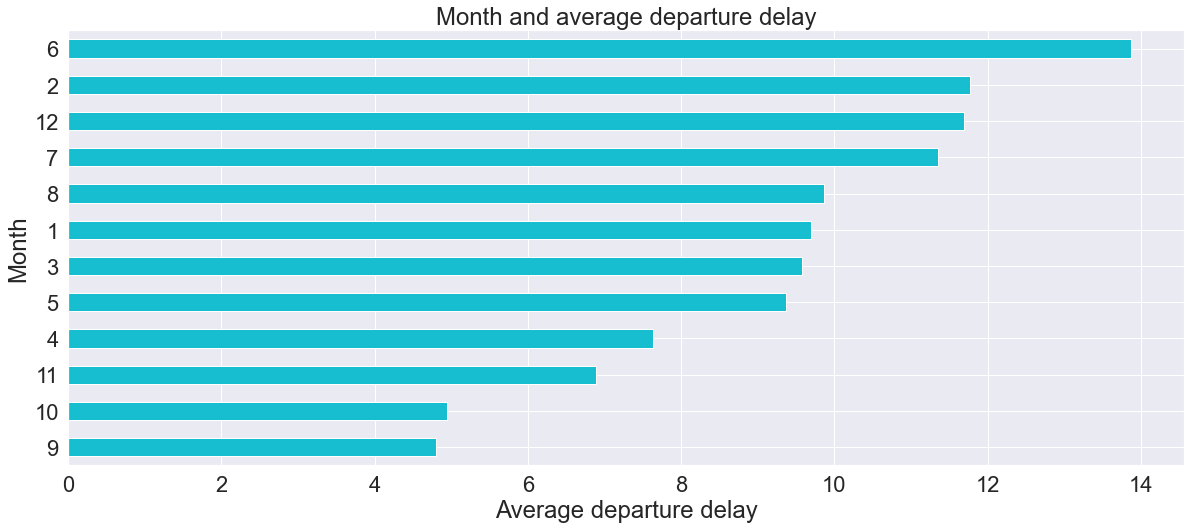

In [92]:
flights1.groupby('MONTH').mean()['DEPARTURE_DELAY'].sort_values().plot(kind='barh', color = 'tab:cyan')
plt.xlabel("Average departure delay")
plt.ylabel("Month")
plt.title('Month and average departure delay')
plt.show()

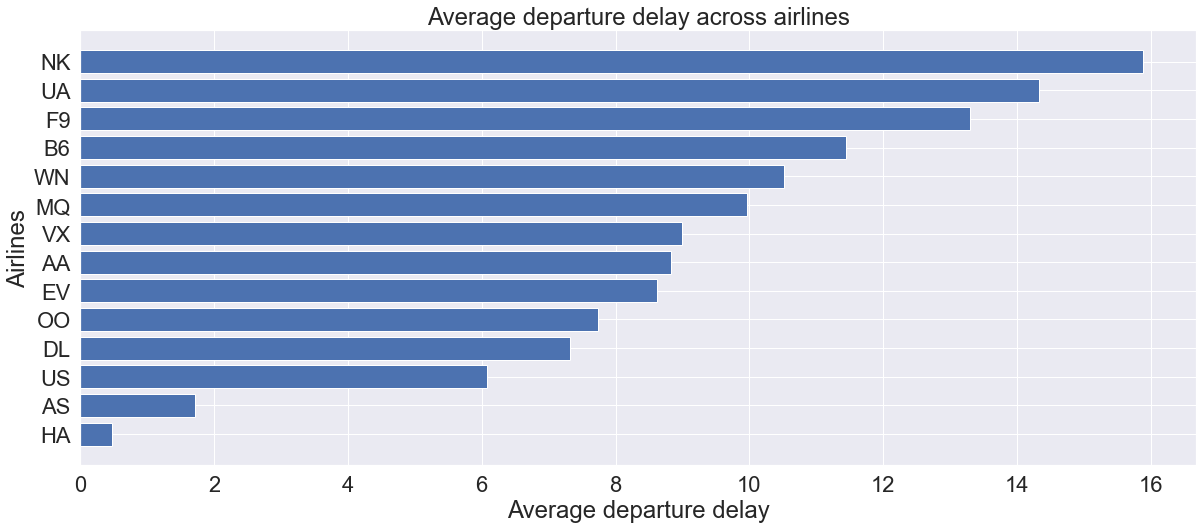

In [93]:
dep_air = flights1.groupby('AIRLINE').mean()['DEPARTURE_DELAY'].sort_values()

plt.barh(y = dep_air.index, width = dep_air.values)
plt.xlabel("Average departure delay")
plt.ylabel("Airlines")
plt.title("Average departure delay across airlines")
plt.show()

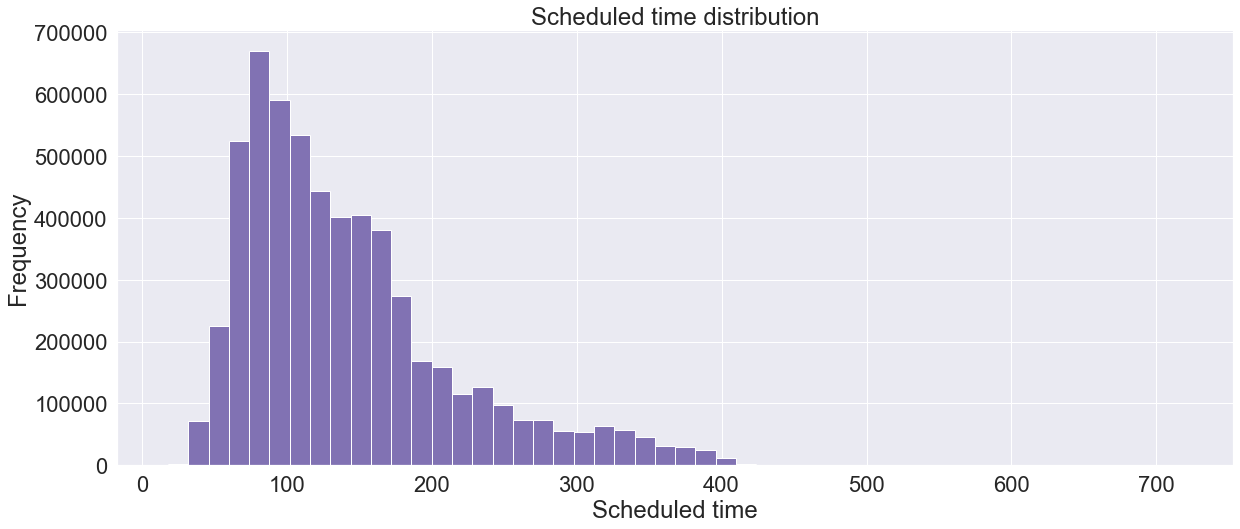

In [94]:
plt.hist(flights1['SCHEDULED_TIME'], 50, facecolor='m', alpha=1)   
plt.xlabel('Scheduled time')
plt.ylabel('Frequency')
plt.title('Scheduled time distribution')
plt.grid(True)
plt.show()

In [95]:
print('stats for Scheduled_time, that is, planned time amount needed for the flight trip')
n, min_max, mean, var, skew, kurt = stats.describe(flights1['SCHEDULED_TIME'])
print("Number of elements:", n)
print("Minimum - maximum range:", min_max )
print("Mean:", round(mean,2))
print("Variance:", round(var, 2))
print("Skew:", round(skew,2))
print("Kurtosis:", round(kurt,2))

stats for Scheduled_time, that is, planned time amount needed for the flight trip
Number of elements: 5714008
Minimum - maximum range: (18.0, 718.0)
Mean: 141.89
Variance: 5672.2
Skew: 1.34
Kurtosis: 1.94


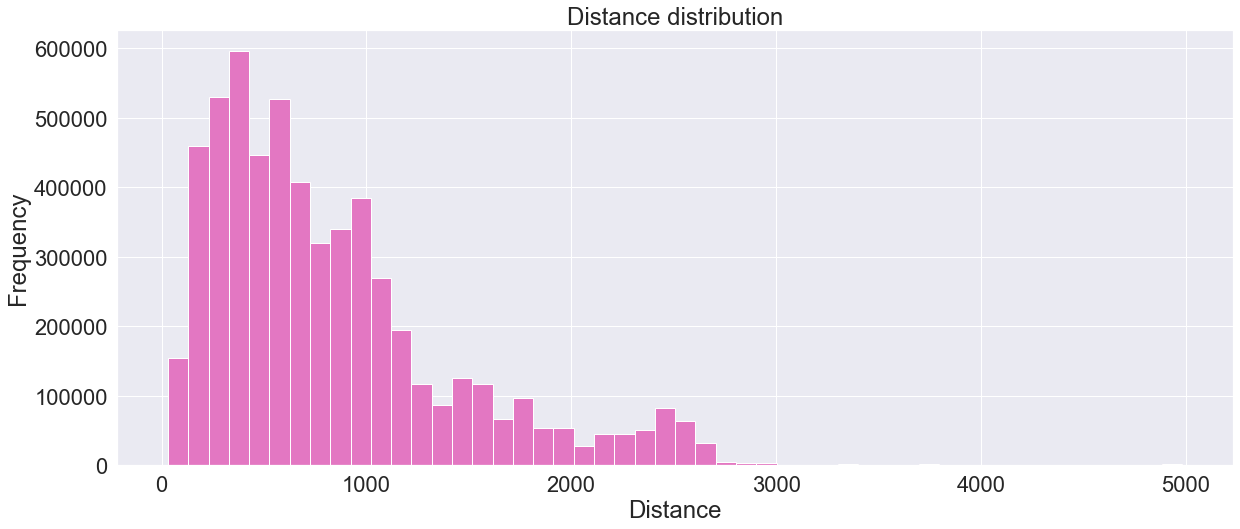

In [96]:
plt.hist(flights1['DISTANCE'], 50, facecolor='tab:pink', alpha=1)   
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.title('Distance distribution')
plt.grid(True)
plt.show()

In [97]:
print('stats for distance between two airports')
n, min_max, mean, var, skew, kurt = stats.describe(flights1['DISTANCE'])
print("Number of elements:", n)
print("Minimum - maximum range:", min_max )
print("Mean:", round(mean,2))
print("Variance:", round(var, 2))
print("Skew:", round(skew,2))
print("Kurtosis:", round(kurt,2))

stats for distance between two airports
Number of elements: 5714008
Minimum - maximum range: (31, 4983)
Mean: 824.46
Variance: 370469.42
Skew: 1.42
Kurtosis: 2.23


In [98]:
min_st = flights1['SCHEDULED_TIME'].min()
flights1['origin_destination_pairs'].loc[flights1['SCHEDULED_TIME'] == min_st].unique()

array([('WRG', 'PSG')], dtype=object)

In [99]:
min_d = flights1['DISTANCE'].min()
flights1['origin_destination_pairs'].loc[flights1['DISTANCE'] == min_d].unique()

array([('WRG', 'PSG'), ('PSG', 'WRG'), ('15841', '14256'),
       ('14256', '15841')], dtype=object)

In [100]:
airports.loc[airports['IATA_CODE'] == 'PSG']

IATA_CODE                              AIRPORT        CITY STATE  \
249       PSG  Petersburg James A. Johnson Airport  Petersburg    AK   

     LATITUDE  LONGITUDE  
249  56.80165 -132.94528

In [101]:
lat_x3 = df['LATITUDE_x'].loc[df['ORIGIN_AIRPORT'] == 'WRG'].unique()
lon_x3 = df['LONGITUDE_x'].loc[df['ORIGIN_AIRPORT'] == 'WRG'].unique()

lat_y3 = df['LATITUDE_y'].loc[df['DESTINATION_AIRPORT'] == 'PSG'].unique()
lon_y3 = df['LONGITUDE_y'].loc[df['DESTINATION_AIRPORT'] == 'PSG'].unique()

lat_st_min = pd.Series([lat_x3[0], lat_y3[0]])
lon_st_min = pd.Series([lon_x3[0], lon_y3[0]])

In [102]:
short_df3 = pd.DataFrame(['WRG', 'PSG'], columns = ['airport'])
short_df3['latitude'] = lat_st_min
short_df3['longitude'] = lon_st_min
short_df3

airport  latitude  longitude
0     WRG  56.48433 -132.36982
1     PSG  56.80165 -132.94528

In [103]:
fig = go.Figure()

fig.add_trace(go.Scattergeo(
    locationmode = 'USA-states',
    lon = short_df3['longitude'],
    lat = short_df3['latitude'],
    mode="lines+markers+text",
    name="Lines, Markers and Text",
    text=["WRG", "PSG"],
    textposition="top right",
    marker = dict(
        size = 2,
        color = 'rgb(255, 0, 0)',
        line = dict(
            width = 3,
            color = 'rgba(68, 68, 68, 0)'
        )
    )))
fig.add_trace(
        go.Scattergeo(
            locationmode = 'USA-states',
            lon = [short_df3['longitude'][0], short_df3['longitude'][1]],
            lat = [short_df3['latitude'][0], short_df3['latitude'][1]],
            mode = 'lines',
            line = dict(width = 1,color = 'red')
        )
    )
fig.update_layout(
    title_text = 'The flight path between airports with shortest time amount needed for the trip and shortest distance',
    showlegend = False,
    geo = dict(
        scope = 'north america',
        projection_type = 'azimuthal equal area',
        showland = True,
        landcolor = 'rgb(243, 243, 243)',
        countrycolor = 'rgb(204, 204, 204)',
    ),
)

fig.show()

In [104]:
max_st = flights1['SCHEDULED_TIME'].max()
flights1['origin_destination_pairs'].loc[flights1['SCHEDULED_TIME'] == max_st].unique()

array([('JFK', 'HNL')], dtype=object)

In [105]:
max_d = flights1['DISTANCE'].max()
flights1['origin_destination_pairs'].loc[flights1['DISTANCE'] == max_d].unique()

array([('JFK', 'HNL'), ('HNL', 'JFK'), ('12478', '12173'),
       ('12173', '12478')], dtype=object)

In [106]:
airports.loc[airports['IATA_CODE'] == 'HNL']

IATA_CODE                         AIRPORT      CITY STATE  LATITUDE  \
141       HNL  Honolulu International Airport  Honolulu    HI  21.31869   

     LONGITUDE  
141 -157.92241

In [107]:
lat_x4 = df['LATITUDE_x'].loc[df['ORIGIN_AIRPORT'] == 'JFK'].unique()
lon_x4 = df['LONGITUDE_x'].loc[df['ORIGIN_AIRPORT'] == 'JFK'].unique()

lat_y4 = df['LATITUDE_y'].loc[df['DESTINATION_AIRPORT'] == 'HNL'].unique()
lon_y4 = df['LONGITUDE_y'].loc[df['DESTINATION_AIRPORT'] == 'HNL'].unique()

lat_st_max = pd.Series([lat_x4[0], lat_y4[0]])
lon_st_max = pd.Series([lon_x4[0], lon_y4[0]])

In [108]:
short_df4 = pd.DataFrame(['JFK', 'HNL'], columns = ['airport'])
short_df4['latitude'] = lat_st_max
short_df4['longitude'] = lon_st_max
short_df4

airport  latitude  longitude
0     JFK  40.63975  -73.77893
1     HNL  21.31869 -157.92241

In [109]:
fig = go.Figure()

fig.add_trace(go.Scattergeo(
    locationmode = 'USA-states',
    lon = short_df4['longitude'],
    lat = short_df4['latitude'],
    mode="lines+markers+text",
    name="Lines, Markers and Text",
    text=["JFK", "HNL"],
    textposition="top right",
    marker = dict(
        size = 2,
        color = 'rgb(255, 0, 0)',
        line = dict(
            width = 3,
            color = 'rgba(68, 68, 68, 0)'
        )
    )))
fig.add_trace(
        go.Scattergeo(
            locationmode = 'USA-states',
            lon = [short_df4['longitude'][0], short_df4['longitude'][1]],
            lat = [short_df4['latitude'][0], short_df4['latitude'][1]],
            mode = 'lines',
            line = dict(width = 1,color = 'red')
        )
    )
fig.update_layout(
    title_text = 'The flight path between airports with longest time amount needed for the trip and longest distance',
    showlegend = False,
    geo = dict(
        scope = 'north america',
        projection_type = 'azimuthal equal area',
        showland = True,
        landcolor = 'rgb(243, 243, 243)',
        countrycolor = 'rgb(204, 204, 204)',
    ),
)

fig.show()

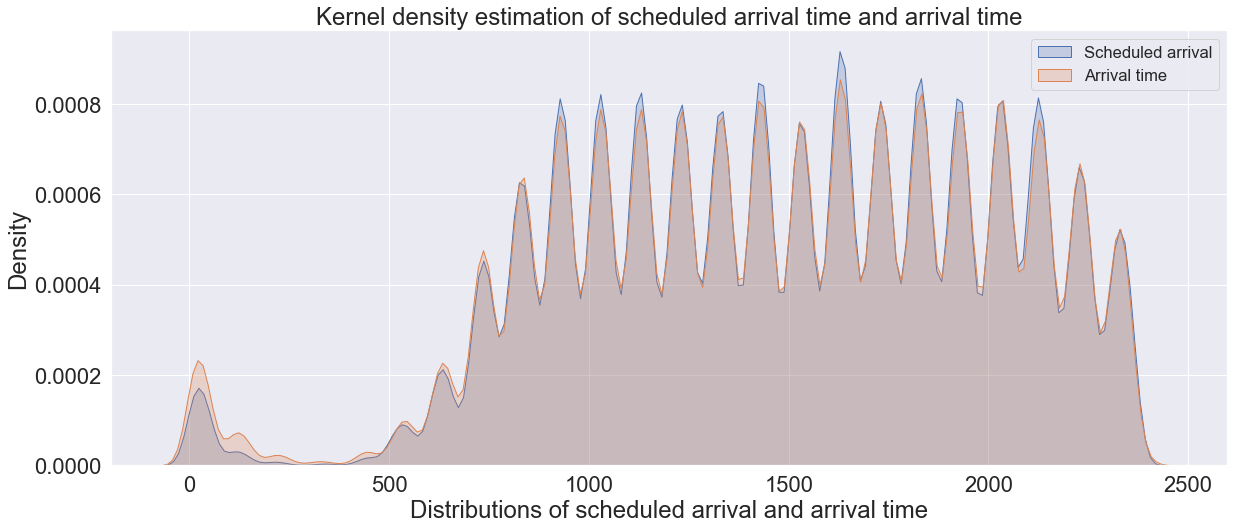

In [110]:
plt.title('Kernel density estimation of scheduled arrival time and arrival time')
sns.set(font_scale=1.5, rc={"figure.figsize": (17, 9)})
sns.kdeplot(flights1['SCHEDULED_ARRIVAL'], shade=True, label = 'Scheduled arrival')
sns.kdeplot(flights1['ARRIVAL_TIME'], shade=True, label = 'Arrival time')
plt.xlabel('Distributions of scheduled arrival and arrival time')
plt.legend(loc = 'upper right')
plt.show()

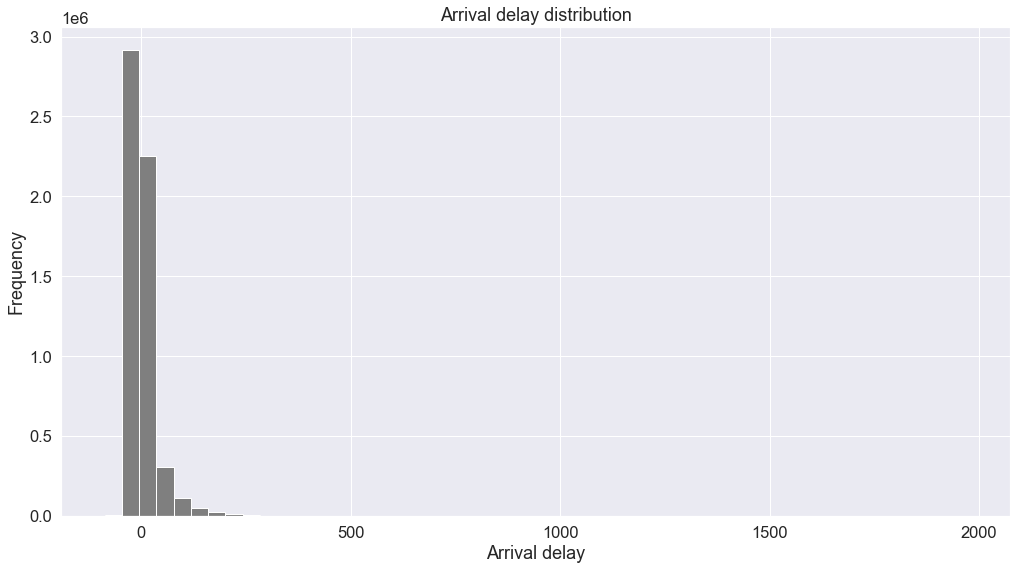

In [111]:
plt.hist(flights1['ARRIVAL_DELAY'], 50, facecolor='tab:gray', alpha=1)   
plt.xlabel('Arrival delay')
plt.ylabel('Frequency')
plt.title('Arrival delay distribution')
plt.grid(True)
plt.show()

In [112]:
arrival_result = []
arrival_delay = [] #yes,no

for i in flights1['ARRIVAL_DELAY']:
    if i>0:
        arrival_delay.append('yes')
        if 15>i>0:
            arrival_result.append('a_delay < 15')
            
        elif 45>i>=15:
            arrival_result.append('15 <= a_delay < 45')
            
        elif i>=45:
            arrival_result.append('45 <= a_delay')
            
    elif i==0:
        arrival_delay.append('no')
        arrival_result.append('flight on time')
        
    else:
        arrival_delay.append('no')
        arrival_result.append('flight arrived earlier')

In [113]:
flights1['Arrival_result'] = arrival_result
flights1['Arrival_result'].value_counts()

flight arrived earlier    3500899
a_delay < 15              1023457
15 <= a_delay < 45         616330
45 <= a_delay              447109
flight on time             126213
Name: Arrival_result, dtype: int64

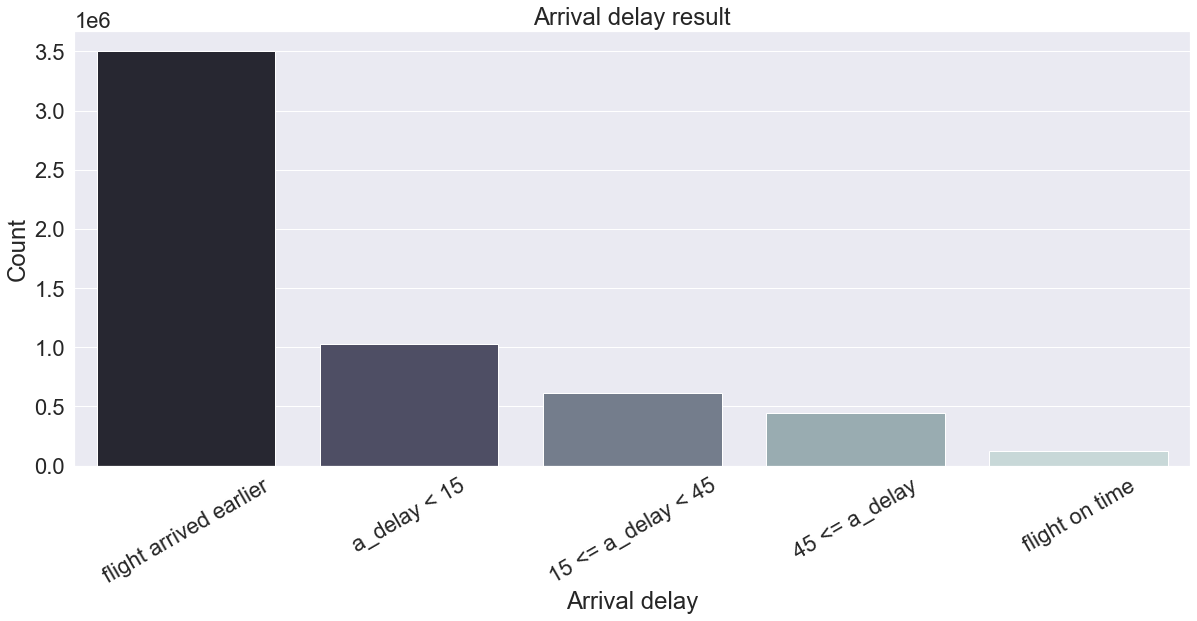

In [114]:
sns.set(font_scale=2, rc={"figure.figsize": (20, 8)}) 
cp = sns.countplot(x="Arrival_result", data=flights1, palette='bone', order = flights1['Arrival_result'].value_counts().index)
plt.xlabel("Arrival delay")
plt.setp(cp.get_xticklabels(), rotation=30)
plt.ylabel("Count")
plt.title('Arrival delay result')
plt.show()

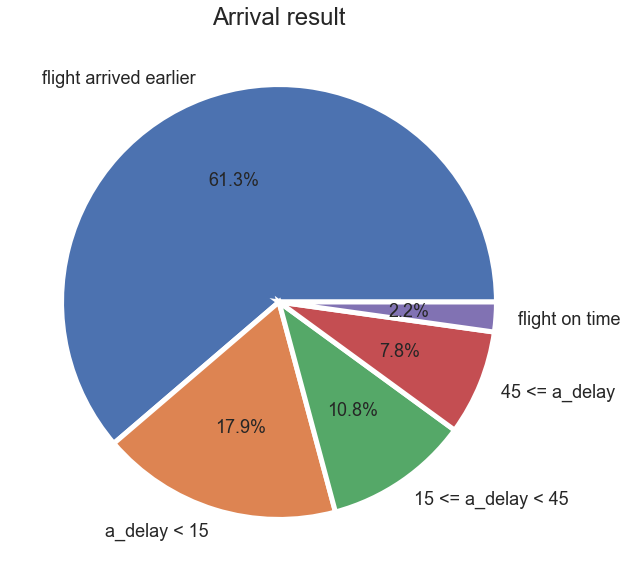

In [115]:
plt.figure(figsize=(17,10))
labele = list(flights1['Arrival_result'].value_counts().index)
plt.pie(flights1['Arrival_result'].value_counts(), autopct = '%.1f%%', labels = labele, textprops={'fontsize': 18}, wedgeprops={'linewidth': 5.0, 'edgecolor': 'white'})
plt.title("Arrival result")
plt.show()

In [116]:
flights1['arrival_delay'] = arrival_delay
flights1['arrival_delay'].value_counts()

no     3627112
yes    2086896
Name: arrival_delay, dtype: int64

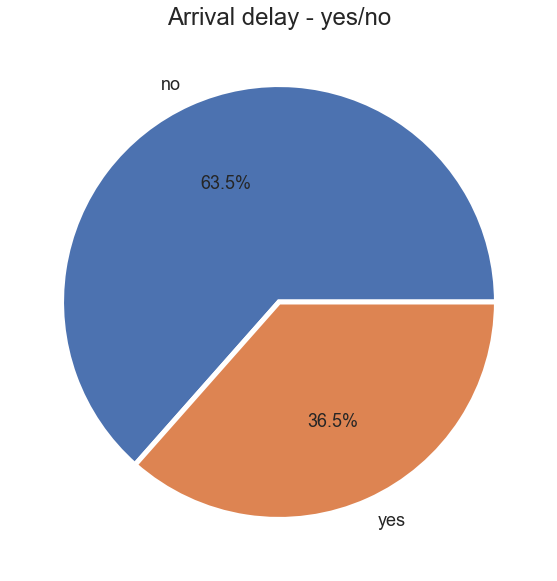

In [117]:
plt.figure(figsize=(17,10))
labele = list(flights1['arrival_delay'].value_counts().index)
plt.pie(flights1['arrival_delay'].value_counts(), autopct = '%.1f%%', labels = labele, textprops={'fontsize': 18}, wedgeprops={'linewidth': 5.0, 'edgecolor': 'white'})
plt.title("Arrival delay - yes/no")
plt.show()

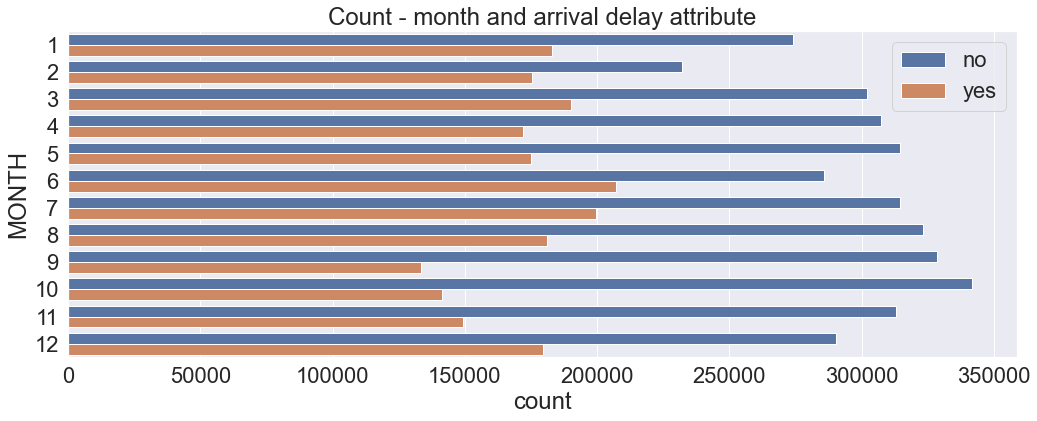

In [118]:
plt.figure(figsize=(17,6))
sns.countplot(y="MONTH", hue="arrival_delay", data=flights1) 
plt.title('Count - month and arrival delay attribute')
plt.legend(loc = 'upper right')
plt.show()

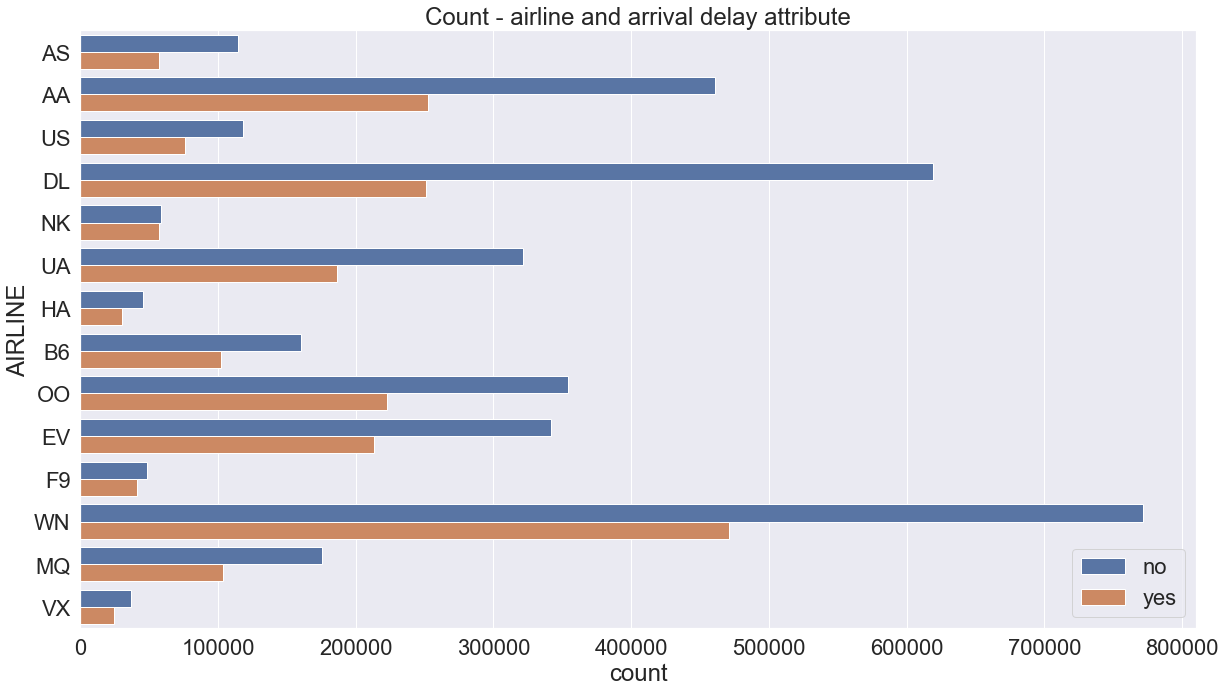

In [119]:
plt.figure(figsize=(20,11))
sns.countplot(y="AIRLINE", hue="arrival_delay", data=flights1) 
plt.title('Count - airline and arrival delay attribute')
plt.legend(loc = 'lower right')
plt.show()

In [120]:
ad = flights1.loc[flights1['arrival_delay'] == 'yes']
ad['origin_destination_pairs'].value_counts()

(SFO, LAX)        6431
(LAX, SFO)        5845
(LAS, LAX)        4974
(LAX, LAS)        4195
(LAX, JFK)        3972
                  ... 
(11423, 11433)       1
(10469, 11433)       1
(DEN, PHF)           1
(12758, 11292)       1
(13198, 13495)       1
Name: origin_destination_pairs, Length: 8479, dtype: int64

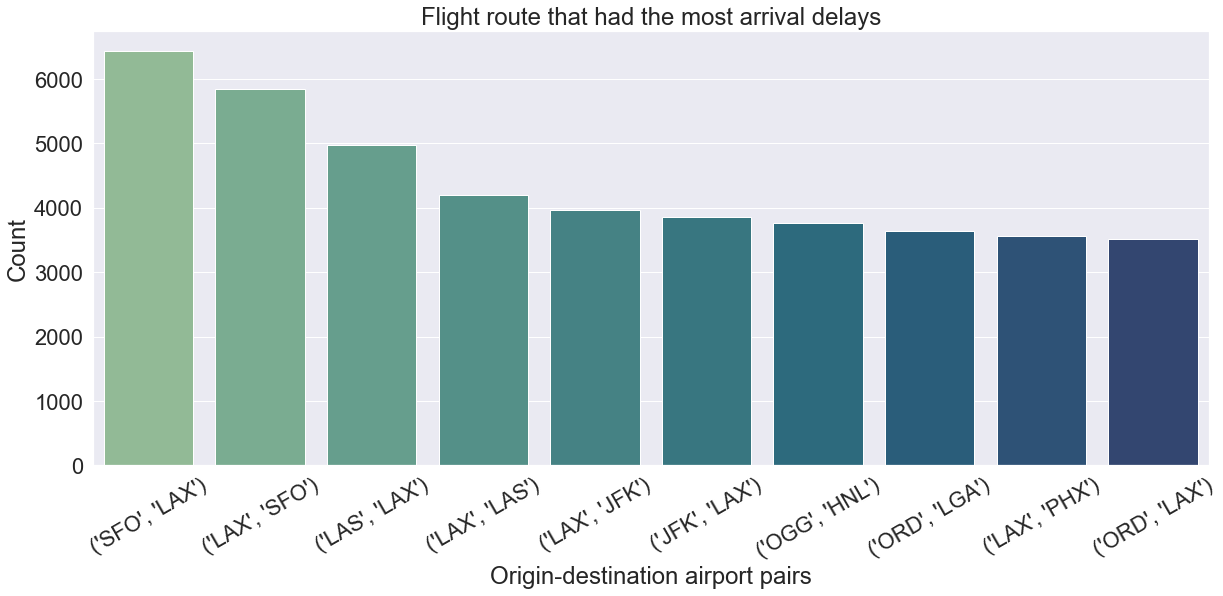

In [121]:
sns.set(font_scale=2, rc={"figure.figsize": (20, 8)}) 
cp = sns.countplot(x="origin_destination_pairs", data=ad, palette='crest', order = ad['origin_destination_pairs'].value_counts()[:10].index)
plt.xlabel("Origin-destination airport pairs")
plt.setp(cp.get_xticklabels(), rotation=30)
plt.ylabel("Count")
plt.title('Flight route that had the most arrival delays')
plt.show()

In [122]:
maks_adelay = flights1['ARRIVAL_DELAY'].max()
flights1['origin_destination_pairs'].loc[flights1['ARRIVAL_DELAY'] == maks_adelay].values

array([('BHM', 'DFW')], dtype=object)

In [123]:
print('The longest arrival delay was' , maks_adelay, 'minutes.')

The longest arrival delay was 1971.0 minutes.


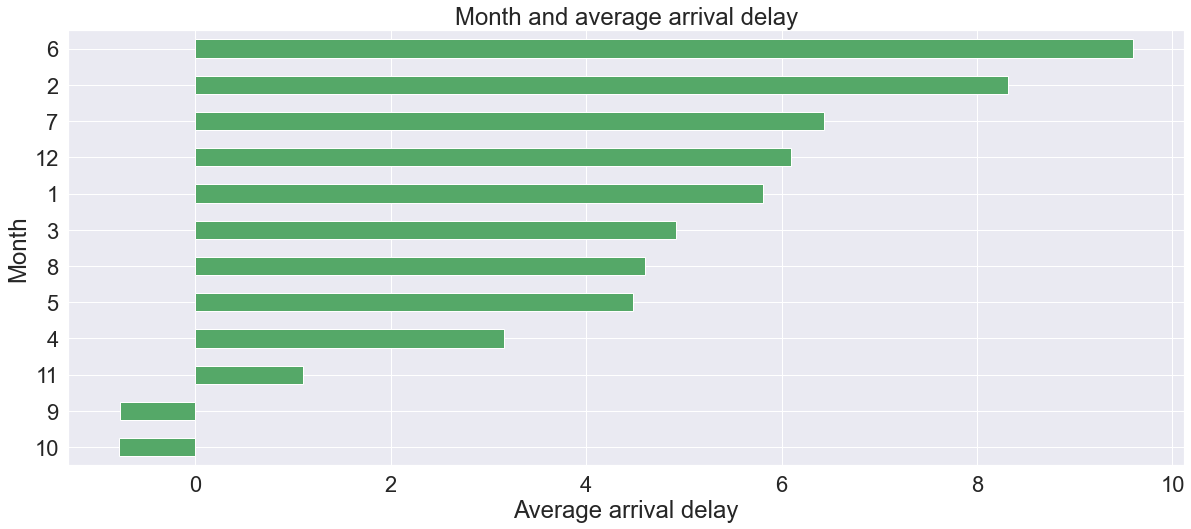

In [124]:
flights1.groupby('MONTH').mean()['ARRIVAL_DELAY'].sort_values().plot(kind='barh', color = 'g')
plt.xlabel("Average arrival delay")
plt.ylabel("Month")
plt.title('Month and average arrival delay')
plt.show()

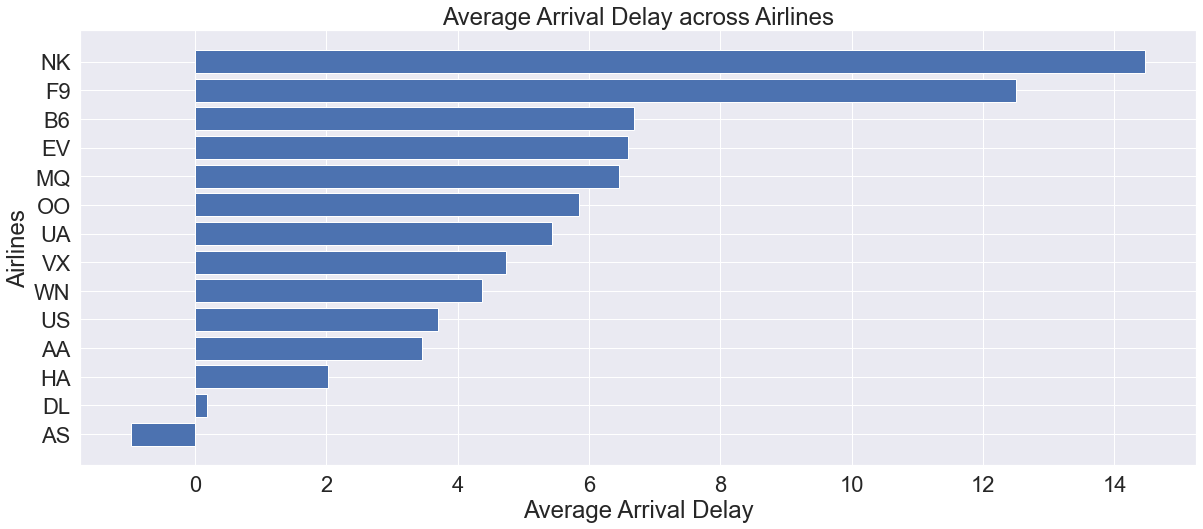

In [125]:
plt.figure(figsize=(20,8))
ar_air = flights1.groupby('AIRLINE').mean()['ARRIVAL_DELAY'].sort_values()

plt.barh(y = ar_air.index, width = ar_air.values)
plt.xlabel("Average Arrival Delay")
plt.ylabel("Airlines")
plt.title("Average Arrival Delay across Airlines")
plt.show()

# Cancellation reasons and delays

In [126]:
print('In flights1 dataset, we have: \n', flights1['DIVERTED'].value_counts())
print(' ')
print('In flights dataset, we have: \n', flights['DIVERTED'].value_counts())

In flights1 dataset, we have: 
 0    5714008
Name: DIVERTED, dtype: int64
 
In flights dataset, we have: 
 0    5803892
1      15187
Name: DIVERTED, dtype: int64


In [127]:
print('In flights1 dataset, we have: \n', flights1['CANCELLED'].value_counts())
print(' ')
print('In flights dataset, we have: \n', flights['CANCELLED'].value_counts())

In flights1 dataset, we have: 
 0    5714008
Name: CANCELLED, dtype: int64
 
In flights dataset, we have: 
 0    5729195
1      89884
Name: CANCELLED, dtype: int64


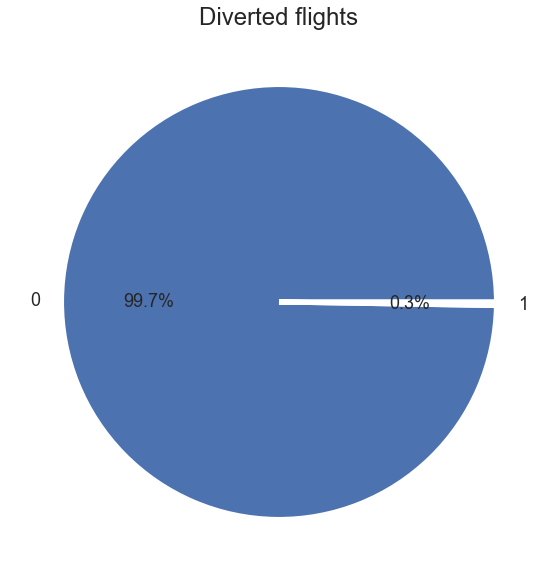

In [128]:
plt.figure(figsize=(17,10))
labele = list(flights['DIVERTED'].value_counts().index)
plt.pie(flights['DIVERTED'].value_counts(), autopct = '%.1f%%', labels = labele, textprops={'fontsize': 18}, wedgeprops={'linewidth': 5.0, 'edgecolor': 'white'})
plt.title("Diverted flights")
plt.show()

In [129]:
div = flights.loc[(flights['DIVERTED'] == 1)]['AIRLINE']
div.value_counts()

WN    3409
AA    2130
EV    1994
DL    1782
OO    1579
UA    1388
MQ     816
B6     730
US     425
AS     413
NK     182
F9     158
VX     121
HA      60
Name: AIRLINE, dtype: int64

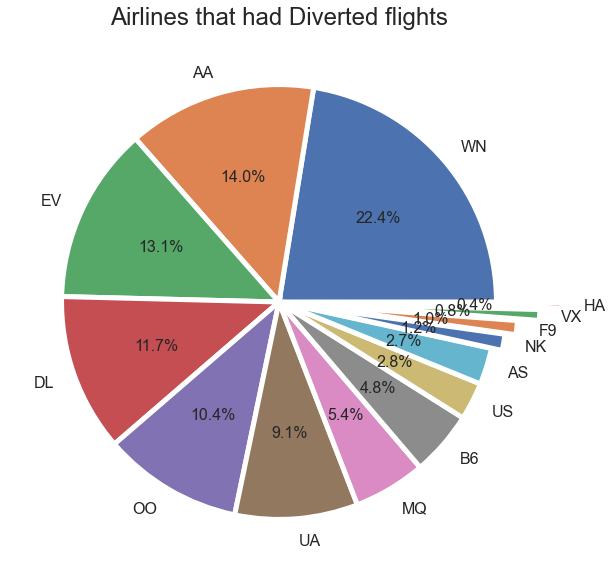

In [130]:
plt.figure(figsize=(17,10))
labele = list(div.value_counts().index)
myExplode = [0,0,0,0,0,0,0,0,0,0,0.05,0.1,0.2, 0.3]
plt.pie(div.value_counts(), autopct = '%.1f%%', labels = labele,explode = myExplode, textprops={'fontsize': 16}, wedgeprops={'linewidth': 5.0, 'edgecolor': 'white'})
plt.title("Airlines that had Diverted flights")
plt.show()

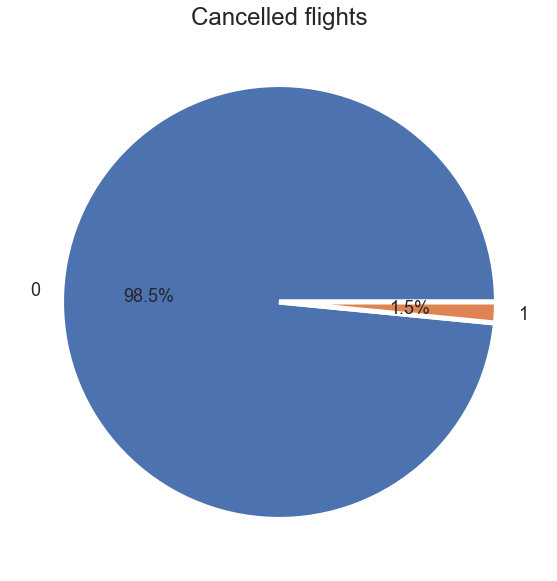

In [131]:
plt.figure(figsize=(17,10))
labele = list(flights['CANCELLED'].value_counts().index)
plt.pie(flights['CANCELLED'].value_counts(), autopct = '%.1f%%', labels = labele, textprops={'fontsize': 18}, wedgeprops={'linewidth': 5.0, 'edgecolor': 'white'})
plt.title("Cancelled flights")
plt.show()

In [132]:
cancelled_flights = pd.DataFrame(flights.loc[(flights['CANCELLED'] == 1)])
cancelled_flights

MONTH  DAY  DAY_OF_WEEK AIRLINE ORIGIN_AIRPORT DESTINATION_AIRPORT  \
32           1    1            4      AS            ANC                 SEA   
42           1    1            4      AA            PHX                 DFW   
68           1    1            4      OO            MAF                 IAH   
82           1    1            4      MQ            SGF                 DFW   
90           1    1            4      OO            RDD                 SFO   
...        ...  ...          ...     ...            ...                 ...   
5818090     12   31            4      UA            IAH                 TPA   
5818157     12   31            4      UA            SFO                 LAX   
5818318     12   31            4      AA            MIA                 SAN   
5818777     12   31            4      NK            FLL                 IAG   
5818843     12   31            4      AA            SAN                 MIA   

         SCHEDULED_DEPARTURE  DEPARTURE_TIME  DEPARTURE_DELAY  TAXI_OUT  ...  \
32                       135             NaN              NaN       NaN  ...   
42                       200             NaN              NaN       NaN  ...   
68                       510             NaN              NaN       NaN  ...   
82                       525             NaN              NaN       NaN  ...   
90                       530             NaN              NaN       NaN  ...   
...                      ...             ...              ...       ...  ...   
5818090                 1955             NaN              NaN       NaN  ...   
5818157                 2000             NaN              NaN       NaN  ...   
5818318                 2019             NaN              NaN       NaN  ...   
5818777                 2155             NaN              NaN       NaN  ...   
5818843                 2210             NaN              NaN       NaN  ...   

         ARRIVAL_TIME  ARRIVAL_DELAY  DIVERTED  CANCELLED  \
32                NaN            NaN         0          1   
42                NaN            NaN         0          1   
68                NaN            NaN         0          1   
82                NaN            NaN         0          1   
90                NaN            NaN         0          1   
...               ...            ...       ...        ...   
5818090           NaN            NaN         0          1   
5818157           NaN            NaN         0          1   
5818318           NaN            NaN         0          1   
5818777           NaN            NaN         0          1   
5818843           NaN            NaN         0          1   

         CANCELLATION_REASON  AIR_SYSTEM_DELAY  SECURITY_DELAY  AIRLINE_DELAY  \
32                         A               NaN             NaN            NaN   
42                         B               NaN             NaN            NaN   
68                         B               NaN             NaN            NaN   
82                         B               NaN             NaN            NaN   
90                         A               NaN             NaN            NaN   
...                      ...               ...             ...            ...   
5818090                    A               NaN             NaN            NaN   
5818157                    A               NaN             NaN            NaN   
5818318                    A               NaN             NaN            NaN   
5818777                    A               NaN             NaN            NaN   
5818843                    A               NaN             NaN            NaN   

         LATE_AIRCRAFT_DELAY  WEATHER_DELAY  
32                       NaN            NaN  
42                       NaN            NaN  
68                       NaN            NaN  
82                       NaN            NaN  
90                       NaN            NaN  
...                      ...            ...  
5818090                  NaN            NaN  
5818157                  

In [133]:
cancelled_flights = cancelled_flights.reset_index()
cancelled_flights = cancelled_flights.drop('index', axis = 1)

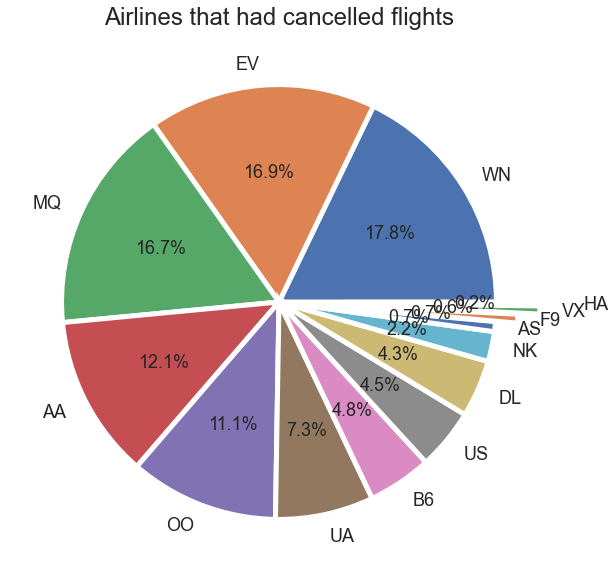

In [134]:
labele = list(cancelled_flights['AIRLINE'].value_counts().index)
myExplode = [0,0,0,0,0,0,0,0,0,0,0,0.1,0.2, 0.3]
plt.figure(figsize=(17,10))
plt.pie(cancelled_flights['AIRLINE'].value_counts(), autopct = '%.1f%%', labels = labele,explode = myExplode, textprops={'fontsize': 18}, wedgeprops={'linewidth': 5.0, 'edgecolor': 'white'})
plt.title("Airlines that had cancelled flights")
plt.show()

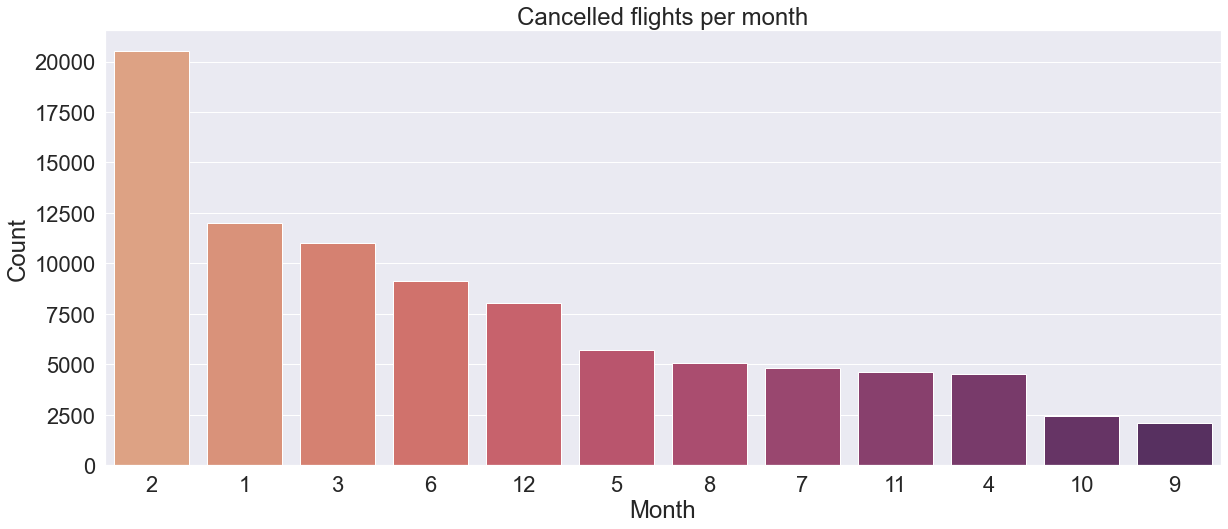

In [135]:
sns.set(font_scale=2, rc={"figure.figsize": (20, 8)}) 
sns.countplot(x="MONTH", data=cancelled_flights, palette="flare", order = cancelled_flights['MONTH'].value_counts().index)
plt.xlabel("Month")
plt.ylabel("Count")
plt.title('Cancelled flights per month')
plt.show()

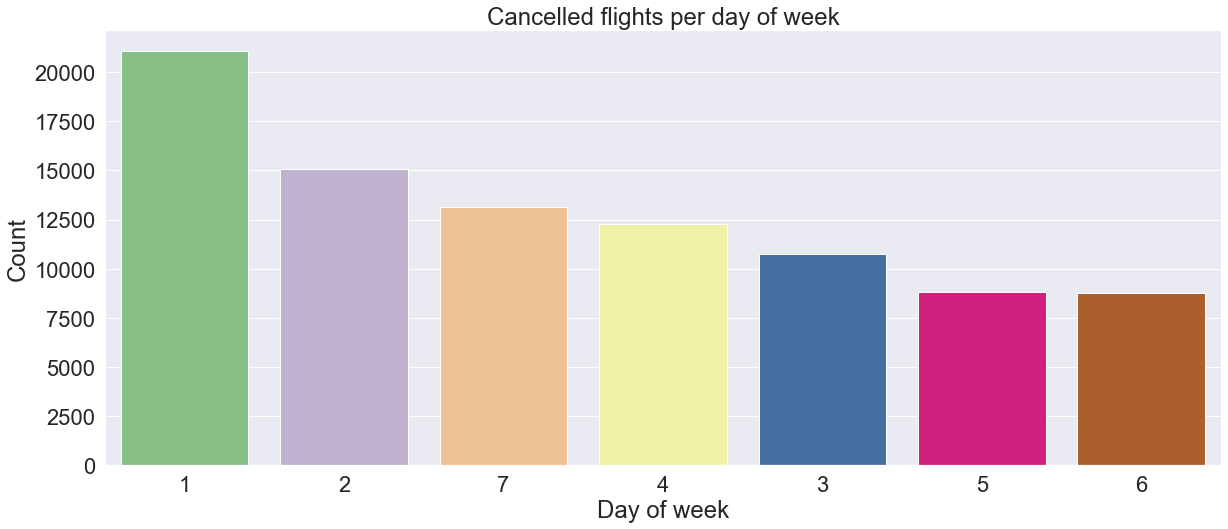

In [136]:
sns.set(font_scale=2, rc={"figure.figsize": (20, 8)}) 
sns.countplot(x="DAY_OF_WEEK", data=cancelled_flights, palette="Accent", order = cancelled_flights['DAY_OF_WEEK'].value_counts().index)
plt.xlabel("Day of week")
plt.ylabel("Count")
plt.title('Cancelled flights per day of week')
plt.show()

In [137]:
origin_destination_cancellation = []

for i in range(cancelled_flights.shape[0]):
    origin = cancelled_flights['ORIGIN_AIRPORT'][i]
    destination = cancelled_flights['DESTINATION_AIRPORT'][i]
    
    origin_destination = (origin,destination)
    origin_destination_cancellation.append(origin_destination)

In [138]:
cancelled_flights['Origin_destination_cancellation'] = origin_destination_cancellation

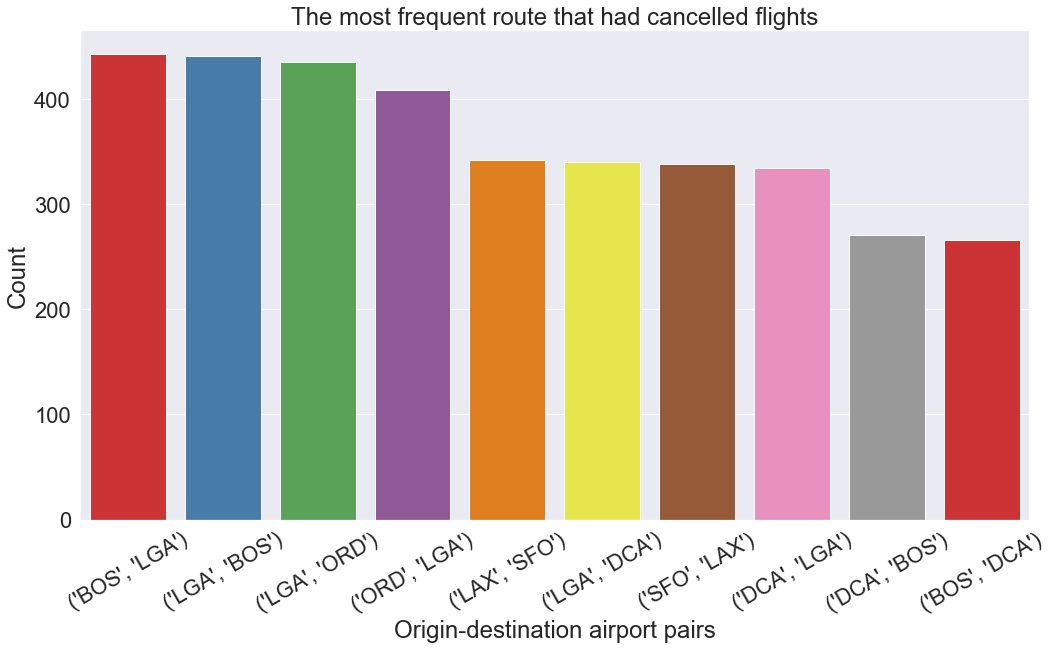

In [139]:
sns.set(font_scale=2, rc={"figure.figsize": (17, 9)}) 
cp = sns.countplot(x="Origin_destination_cancellation", data=cancelled_flights,palette='Set1', order = cancelled_flights['Origin_destination_cancellation'].value_counts()[:10].index)
plt.xlabel("Origin-destination airport pairs")
plt.setp(cp.get_xticklabels(), rotation=30)
plt.ylabel("Count")
plt.title('The most frequent route that had cancelled flights')
plt.show() 

In [140]:
flights['CANCELLATION_REASON'].value_counts()

B    48851
A    25262
C    15749
D       22
Name: CANCELLATION_REASON, dtype: int64

In [141]:
broj_neNaN_podataka = 0
for x in range(4):
    broj_neNaN_podataka += flights['CANCELLATION_REASON'].value_counts()[x]

print(broj_neNaN_podataka)

89884


In [142]:
cancelled_flights.shape[0] == broj_neNaN_podataka

True

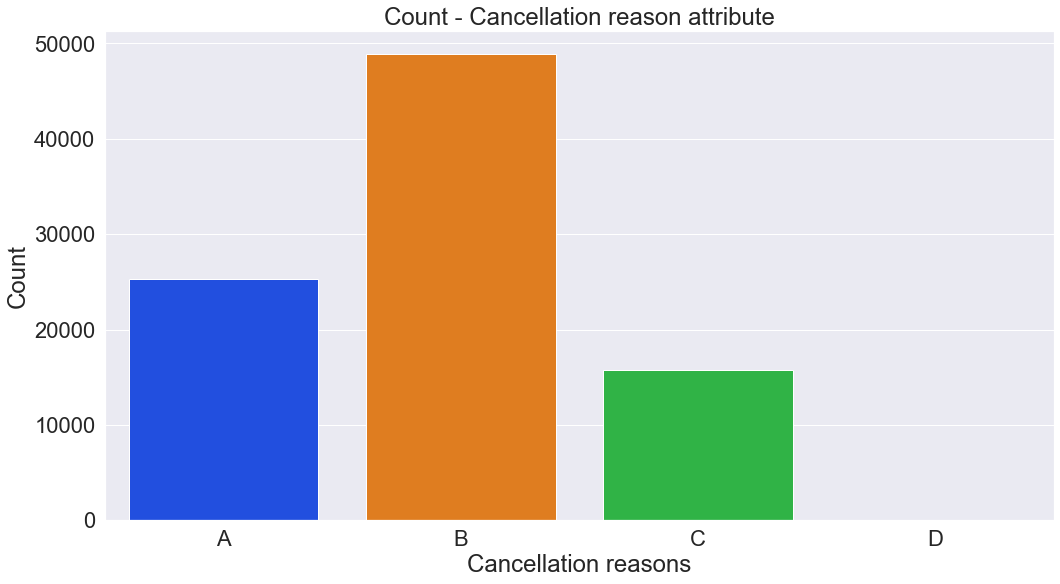

In [143]:
sns.set(font_scale=2, rc={"figure.figsize": (17, 9)}) 
sns.countplot(x='CANCELLATION_REASON', data=cancelled_flights, palette='bright')
plt.xlabel("Cancellation reasons")
plt.ylabel("Count")
plt.title('Count - Cancellation reason attribute')
plt.show()

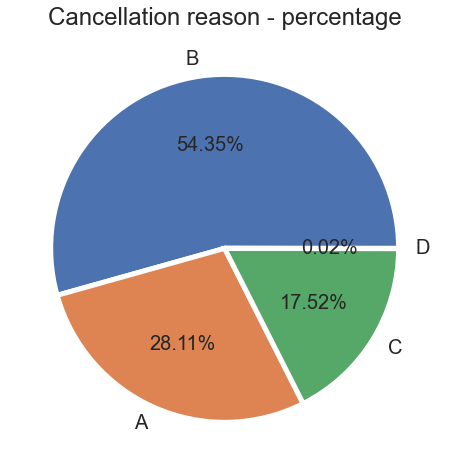

In [144]:
labele = list(cancelled_flights['CANCELLATION_REASON'].value_counts().index)
plt.figure(figsize=(15,8))
plt.pie(cancelled_flights['CANCELLATION_REASON'].value_counts(), autopct = '%.2f%%', labels = labele, textprops={'fontsize': 20}, wedgeprops={'linewidth': 5.0, 'edgecolor': 'white'})
plt.title("Cancellation reason - percentage")
plt.show()

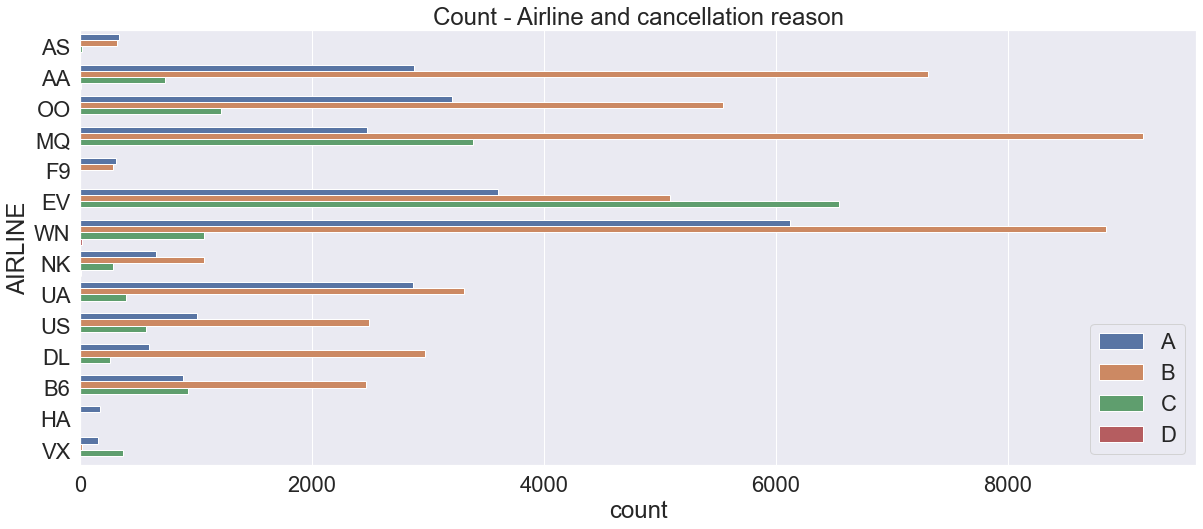

In [145]:
plt.figure(figsize=(20,8))
sns.countplot(y="AIRLINE", hue="CANCELLATION_REASON", data=cancelled_flights) 
plt.title('Count - Airline and cancellation reason')
plt.legend(loc = 'lower right')
plt.show()

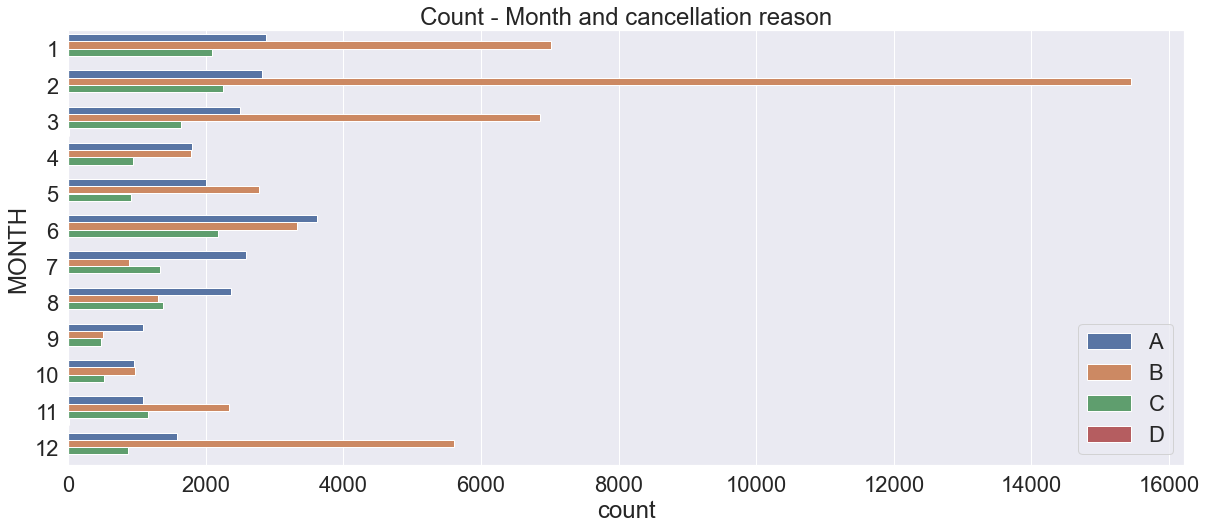

In [146]:
plt.figure(figsize=(20,8))
sns.countplot(y="MONTH", hue="CANCELLATION_REASON", data=cancelled_flights) 
plt.title('Count - Month and cancellation reason')
plt.legend(loc = 'lower right')
plt.show()

In [147]:
flights['AIR_SYSTEM_DELAY'].value_counts()

0.0      498613
1.0       28003
15.0      23199
2.0       22981
3.0       21446
          ...  
556.0         1
739.0         1
417.0         1
442.0         1
401.0         1
Name: AIR_SYSTEM_DELAY, Length: 570, dtype: int64

In [148]:
def procenat(x):
    br_nenull = flights.shape[0] - x.isna().sum()
    br = x.value_counts()[0]*100/br_nenull
    print(round(br,1),'%')

In [149]:
print('There was no delay:')
procenat(flights['AIR_SYSTEM_DELAY'])

There was no delay:
46.9 %


In [150]:
print('Minimum delay was:' ,flights['AIR_SYSTEM_DELAY'].min())
print('Maximum delay was:', flights['AIR_SYSTEM_DELAY'].max())
print('Average delay was:', round(flights['AIR_SYSTEM_DELAY'].mean(),2))

Minimum delay was: 0.0
Maximum delay was: 1134.0
Average delay was: 13.48


In [151]:
air_system_delay_result = [] 
air_system_delay = [] #yes,no

for i in flights['AIR_SYSTEM_DELAY']:
    if i>0:
        air_system_delay.append('yes')
        if 15>i>0:
            air_system_delay_result.append('air_system_delay < 15')
            
        elif 45>i>=15:
            air_system_delay_result.append('15 <= air_system_delay < 45')
            
        elif i>=45:
            air_system_delay_result.append('45 <= air_system_delay')
            
    else:
        air_system_delay.append('no')
        air_system_delay_result.append('no delay/NaN values')

In [152]:
flights['air_system_delay'] = air_system_delay
flights['air_system_delay'].value_counts()

no     5254253
yes     564826
Name: air_system_delay, dtype: int64

In [153]:
flights['air_system_delay_result'] = air_system_delay_result
flights['air_system_delay_result'].value_counts()

no delay/NaN values            5254253
15 <= air_system_delay < 45     253844
air_system_delay < 15           234953
45 <= air_system_delay           76029
Name: air_system_delay_result, dtype: int64

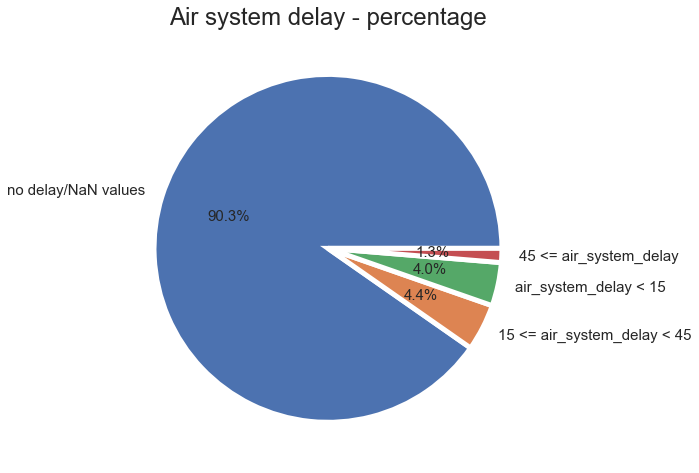

In [154]:
labele = list(flights['air_system_delay_result'].value_counts().index)
plt.figure(figsize=(15,8))
plt.pie(flights['air_system_delay_result'].value_counts(), autopct = '%.1f%%', labels = labele, textprops={'fontsize': 15}, wedgeprops={'linewidth': 5.0, 'edgecolor': 'white'})
plt.title("Air system delay - percentage")
plt.show()

In [155]:
flights['SECURITY_DELAY'].value_counts()

0.0      1059955
15.0         158
8.0          127
10.0         125
12.0         124
          ...   
158.0          1
191.0          1
237.0          1
164.0          1
84.0           1
Name: SECURITY_DELAY, Length: 154, dtype: int64

In [156]:
print('There was no delay:')
procenat(flights['SECURITY_DELAY'])

There was no delay:
99.7 %


In [157]:
print('Minimum delay was:' ,flights['SECURITY_DELAY'].min())
print('Maximum delay was:', flights['SECURITY_DELAY'].max())
print('Average delay was:', round(flights['SECURITY_DELAY'].mean(),2))

Minimum delay was: 0.0
Maximum delay was: 573.0
Average delay was: 0.08


In [158]:
security_delay_result = [] 
security_delay = [] #yes,no

for i in flights['SECURITY_DELAY']:
    if i>0:
        security_delay.append('yes')
        if 15>i>0:
            security_delay_result.append('security_delay < 15')
            
        elif 45>i>=15:
            security_delay_result.append('15 <= security_delay < 45')
            
        elif i>=45:
            security_delay_result.append('45 <= security_delay')
            
    else:
        security_delay.append('no')
        security_delay_result.append('no delay/NaN values')

In [159]:
flights['security_delay'] = security_delay
flights['security_delay'].value_counts()

no     5815595
yes       3484
Name: security_delay, dtype: int64

In [160]:
flights['security_delay_result'] = security_delay_result
flights['security_delay_result'].value_counts()

no delay/NaN values          5815595
security_delay < 15             1592
15 <= security_delay < 45       1472
45 <= security_delay             420
Name: security_delay_result, dtype: int64

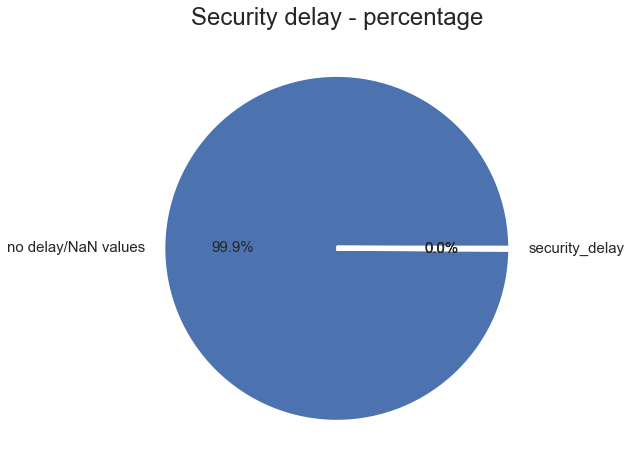

In [161]:
labele = ['no delay/NaN values', 'security_delay', '', '']
plt.figure(figsize=(15,8))
plt.pie(flights['security_delay_result'].value_counts(), autopct = '%.1f%%', labels = labele, textprops={'fontsize': 15}, wedgeprops={'linewidth': 5.0, 'edgecolor': 'white'})
plt.title("Security delay - percentage")
plt.show()

In [162]:
flights['AIRLINE_DELAY'].value_counts()

0.0       493417
1.0        21319
2.0        21211
3.0        20656
4.0        20184
           ...  
1218.0         1
812.0          1
1206.0         1
814.0          1
1169.0         1
Name: AIRLINE_DELAY, Length: 1067, dtype: int64

In [163]:
print('There was no delay:')
procenat(flights['AIRLINE_DELAY'])

There was no delay:
46.4 %


In [164]:
print('Minimum delay was:' ,flights['AIRLINE_DELAY'].min())
print('Maximum delay was:', flights['AIRLINE_DELAY'].max())
print('Average delay was:', round(flights['AIRLINE_DELAY'].mean(),2))

Minimum delay was: 0.0
Maximum delay was: 1971.0
Average delay was: 18.97


In [165]:
airline_delay_result = [] 
airline_delay = [] #yes,no

for i in flights['AIRLINE_DELAY']:
    if i>0:
        airline_delay.append('yes')
        if 15>i>0:
            airline_delay_result.append('airline_delay < 15')
            
        elif 45>i>=15:
            airline_delay_result.append('15 <= airline_delay < 45')
            
        elif i>=45:
            airline_delay_result.append('45 <= airline_delay')
            
    else:
        airline_delay.append('no')
        airline_delay_result.append('no delay/NaN values')

In [166]:
flights['airline_delay'] = airline_delay
flights['airline_delay'].value_counts()

no     5249057
yes     570022
Name: airline_delay, dtype: int64

In [167]:
flights['airline_delay_result'] = airline_delay_result
flights['airline_delay_result'].value_counts()

no delay/NaN values         5249057
airline_delay < 15           242765
15 <= airline_delay < 45     206717
45 <= airline_delay          120540
Name: airline_delay_result, dtype: int64

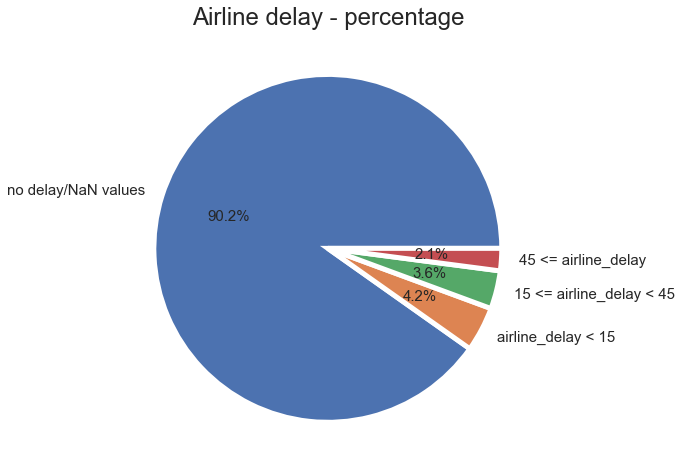

In [168]:
labele = list(flights['airline_delay_result'].value_counts().index)
plt.figure(figsize=(15,8))
plt.pie(flights['airline_delay_result'].value_counts(), autopct = '%.1f%%', labels = labele, textprops={'fontsize': 15}, wedgeprops={'linewidth': 5.0, 'edgecolor': 'white'})
plt.title("Airline delay - percentage")
plt.show()

In [169]:
flights['LATE_AIRCRAFT_DELAY'].value_counts()

0.0       506486
15.0       14522
16.0       13824
17.0       12908
18.0       12259
           ...  
869.0          1
829.0          1
863.0          1
1313.0         1
538.0          1
Name: LATE_AIRCRAFT_DELAY, Length: 695, dtype: int64

In [170]:
print('There was no delay:')
procenat(flights['LATE_AIRCRAFT_DELAY'])

There was no delay:
47.6 %


In [171]:
print('Minimum delay was:' ,flights['LATE_AIRCRAFT_DELAY'].min())
print('Maximum delay was:', flights['LATE_AIRCRAFT_DELAY'].max())
print('Average delay was:', round(flights['LATE_AIRCRAFT_DELAY'].mean(),2))

Minimum delay was: 0.0
Maximum delay was: 1331.0
Average delay was: 23.47


In [172]:
late_aircraft_delay_result = [] 
late_aircraft_delay = [] #yes,no

for i in flights['LATE_AIRCRAFT_DELAY']:
    if i>0:
        late_aircraft_delay.append('yes')
        if 15>i>0:
            late_aircraft_delay_result.append('late_aircraft_delay < 15')
            
        elif 45>i>=15:
            late_aircraft_delay_result.append('15 <= late_aircraft_delay < 45')
            
        elif i>=45:
            late_aircraft_delay_result.append('45 <= late_aircraft_delay')
            
    else:
        late_aircraft_delay.append('no')
        late_aircraft_delay_result.append('no delay/NaN values')

In [173]:
flights['late_aircraft_delay'] = late_aircraft_delay
flights['late_aircraft_delay'].value_counts()

no     5262126
yes     556953
Name: late_aircraft_delay, dtype: int64

In [174]:
flights['late_aircraft_delay_result'] = late_aircraft_delay_result
flights['late_aircraft_delay_result'].value_counts()

no delay/NaN values               5262126
15 <= late_aircraft_delay < 45     237266
45 <= late_aircraft_delay          181638
late_aircraft_delay < 15           138049
Name: late_aircraft_delay_result, dtype: int64

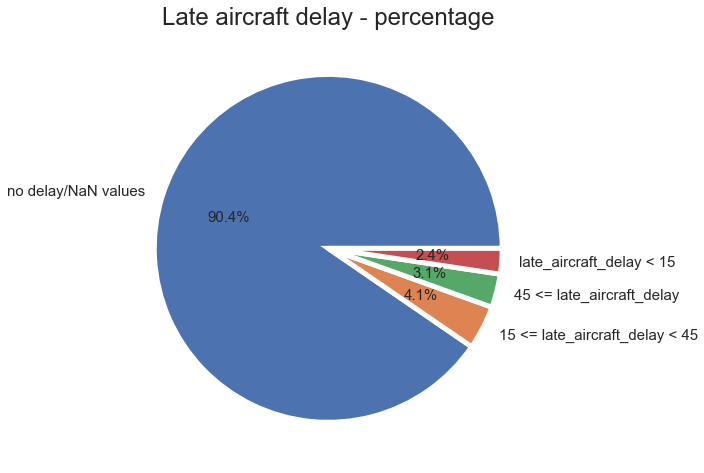

In [175]:
labele = list(flights['late_aircraft_delay_result'].value_counts().index)
plt.figure(figsize=(15,8))
plt.pie(flights['late_aircraft_delay_result'].value_counts(), autopct = '%.1f%%', labels = labele, textprops={'fontsize':15}, wedgeprops={'linewidth': 5.0, 'edgecolor': 'white'})
plt.title("Late aircraft delay - percentage")
plt.show()

In [176]:
flights['WEATHER_DELAY'].value_counts()

0.0      998723
6.0        1649
8.0        1580
7.0        1537
15.0       1498
          ...  
863.0         1
459.0         1
492.0         1
988.0         1
461.0         1
Name: WEATHER_DELAY, Length: 632, dtype: int64

In [177]:
print('There was no delay:')
procenat(flights['WEATHER_DELAY'])

There was no delay:
93.9 %


In [178]:
print('Minimum delay was:' ,flights['WEATHER_DELAY'].min())
print('Maximum delay was:', flights['WEATHER_DELAY'].max())
print('Average delay was:', round(flights['WEATHER_DELAY'].mean(),2))

Minimum delay was: 0.0
Maximum delay was: 1211.0
Average delay was: 2.92


In [179]:
weather_delay_result = [] 
weather_delay = [] #yes,no

for i in flights['WEATHER_DELAY']:
    if i>0:
        weather_delay.append('yes')
        if 15>i>0:
            weather_delay_result.append('weather_delay < 15')
            
        elif 45>i>=15:
            weather_delay_result.append('15 <= weather_delay < 45')
            
        elif i>=45:
            weather_delay_result.append('45 <= weather_delay')
            
    else:
        weather_delay.append('no')
        weather_delay_result.append('no delay/NaN values')

In [180]:
flights['weather_delay'] = weather_delay
flights['weather_delay'].value_counts()

no     5754363
yes      64716
Name: weather_delay, dtype: int64

In [181]:
flights['weather_delay_result'] = weather_delay_result
flights['weather_delay_result'].value_counts()

no delay/NaN values         5754363
15 <= weather_delay < 45      24288
45 <= weather_delay           20688
weather_delay < 15            19740
Name: weather_delay_result, dtype: int64

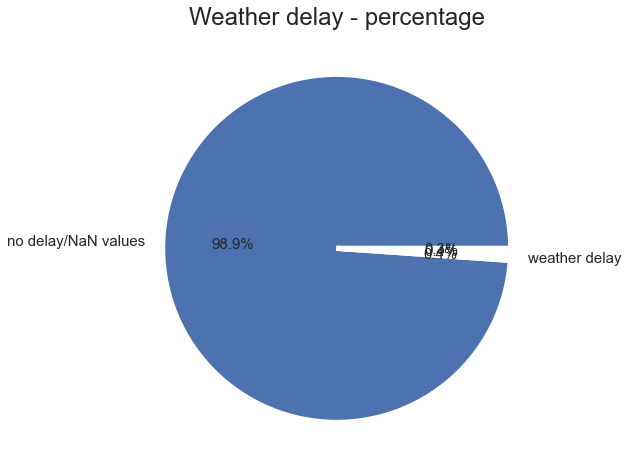

In [182]:
labele = ['no delay/NaN values', 'weather delay', '', '']
plt.figure(figsize=(15,8))
plt.pie(flights['weather_delay_result'].value_counts(), autopct = '%.1f%%', labels = labele, textprops={'fontsize':15}, wedgeprops={'linewidth': 5.0, 'edgecolor': 'white'})
plt.title("Weather delay - percentage")
plt.show()

In [183]:
total_delay = []

for i in range(flights.shape[0]):
    if flights['air_system_delay'][i] == 'yes':
        total_delay.append(1)
        
    else:
        total_delay.append(0)

In [184]:
for i in range(flights.shape[0]):
    if flights['security_delay'][i] == 'yes':
        total_delay[i] +=1
        
    else:
        total_delay[i] +=0

In [185]:
for i in range(flights.shape[0]):
    if flights['airline_delay'][i] == 'yes':
        total_delay[i] +=1
        
    else:
        total_delay[i] +=0

In [186]:
for i in range(flights.shape[0]):
    if flights['late_aircraft_delay'][i] == 'yes':
        total_delay[i] +=1
        
    else:
        total_delay[i] +=0

In [187]:
for i in range(flights.shape[0]):
    if flights['weather_delay'][i] == 'yes':
        total_delay[i] +=1
        
    else:
        total_delay[i] +=0

In [188]:
flights['total_delay'] = total_delay
flights['total_delay'].value_counts()

0    4755640
1     491658
2     448270
3     122241
4       1270
Name: total_delay, dtype: int64

In [189]:
#there are no flights with all 5 reasons for delay
flights.loc[(flights['air_system_delay'] == 'yes') & (flights['security_delay'] == 'yes')& (flights['airline_delay'] == 'yes')& (flights['late_aircraft_delay'] == 'yes')& (flights['weather_delay'] == 'yes')]

Empty DataFrame
Columns: [MONTH, DAY, DAY_OF_WEEK, AIRLINE, ORIGIN_AIRPORT, DESTINATION_AIRPORT, SCHEDULED_DEPARTURE, DEPARTURE_TIME, DEPARTURE_DELAY, TAXI_OUT, WHEELS_OFF, SCHEDULED_TIME, ELAPSED_TIME, AIR_TIME, DISTANCE, WHEELS_ON, TAXI_IN, SCHEDULED_ARRIVAL, ARRIVAL_TIME, ARRIVAL_DELAY, DIVERTED, CANCELLED, CANCELLATION_REASON, AIR_SYSTEM_DELAY, SECURITY_DELAY, AIRLINE_DELAY, LATE_AIRCRAFT_DELAY, WEATHER_DELAY, air_system_delay, air_system_delay_result, security_delay, security_delay_result, airline_delay, airline_delay_result, late_aircraft_delay, late_aircraft_delay_result, weather_delay, weather_delay_result, total_delay]
Index: []

[0 rows x 39 columns]

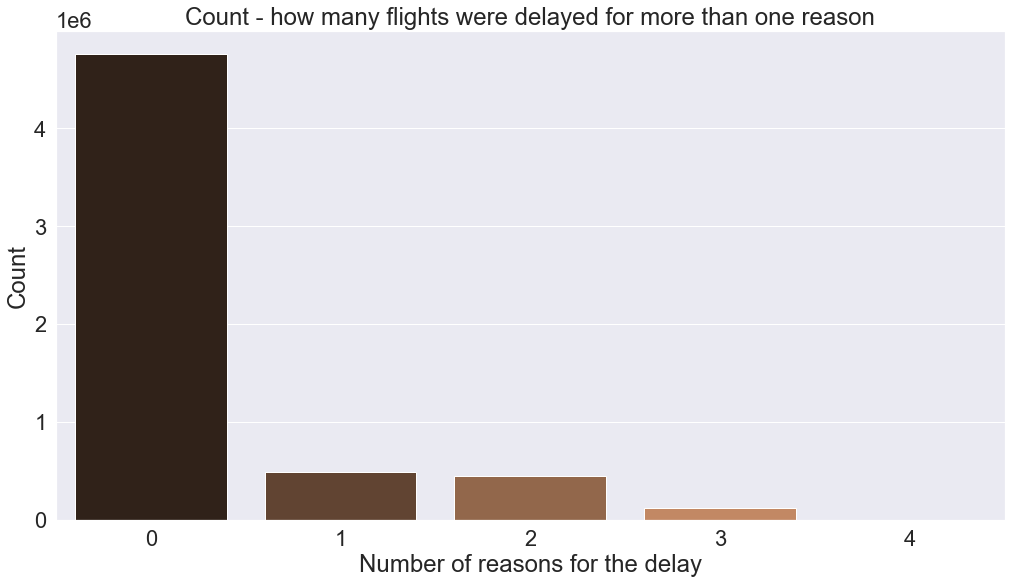

In [190]:
sns.set(font_scale=2, rc={"figure.figsize": (17, 9)})
sns.countplot(x='total_delay', data=flights, palette='copper')
plt.xlabel('Number of reasons for the delay')
plt.ylabel('Count')
plt.title('Count - how many flights were delayed for more than one reason')
plt.show()

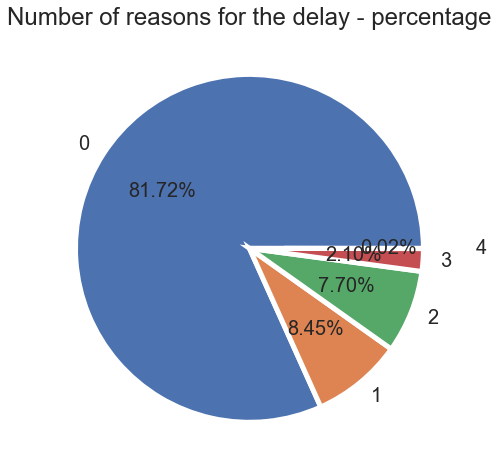

In [191]:
labele = list(flights['total_delay'].value_counts().index)
plt.figure(figsize=(15,8))
myExplode = [0,0,0,0,0.2]
plt.pie(flights['total_delay'].value_counts(), autopct = '%.2f%%',explode = myExplode,labels = labele, textprops={'fontsize': 20}, wedgeprops={'linewidth': 5.0, 'edgecolor': 'white'})
plt.title("Number of reasons for the delay - percentage")
plt.show()

In [192]:
four = pd.DataFrame(flights.loc[(flights['total_delay'] == 4)])
four = four.reset_index()
four = four.drop('index', axis = 1)
four

MONTH  DAY  DAY_OF_WEEK AIRLINE ORIGIN_AIRPORT DESTINATION_AIRPORT  \
0         1    1            4      EV            DEN                 LBB   
1         1    1            4      AA            EGE                 DFW   
2         1    1            4      EV            GUC                 DEN   
3         1    1            4      AA            TUL                 DFW   
4         1    2            5      MQ            BHM                 DFW   
...     ...  ...          ...     ...            ...                 ...   
1265     12   30            3      DL            ATL                 DFW   
1266     12   30            3      DL            ATL                 ORF   
1267     12   30            3      AA            ORD                 PHX   
1268     12   30            3      NK            ATL                 LAS   
1269     12   30            3      DL            ATL                 MCO   

      SCHEDULED_DEPARTURE  DEPARTURE_TIME  DEPARTURE_DELAY  TAXI_OUT  ...  \
0                    1104          1326.0            142.0      13.0  ...   
1                    1225          1300.0             35.0      15.0  ...   
2                    1248          1708.0            260.0      17.0  ...   
3                    1505          1626.0             81.0      45.0  ...   
4                    1045          1149.0             64.0      24.0  ...   
...                   ...             ...              ...       ...  ...   
1265                 1725          1828.0             63.0      31.0  ...   
1266                 1812          2011.0            119.0      20.0  ...   
1267                 2040          2130.0             50.0      21.0  ...   
1268                 2055          2218.0             83.0      18.0  ...   
1269                 2159          2245.0             46.0      18.0  ...   

          air_system_delay_result  security_delay      security_delay_result  \
0           air_system_delay < 15              no        no delay/NaN values   
1           air_system_delay < 15             yes  15 <= security_delay < 45   
2           air_system_delay < 15              no        no delay/NaN values   
3     15 <= air_system_delay < 45              no        no delay/NaN values   
4           air_system_delay < 15              no        no delay/NaN values   
...                           ...             ...                        ...   
1265        air_system_delay < 15              no        no delay/NaN values   
1266        air_system_delay < 15              no        no delay/NaN values   
1267        air_system_delay < 15              no        no delay/NaN values   
1268  15 <= air_system_delay < 45              no        no delay/NaN values   
1269        air_system_delay < 15              no        no delay/NaN values   

      airline_delay      airline_delay_result  late_aircraft_delay  \
0               yes        airline_delay < 15                  yes   
1               yes        airline_delay < 15                  yes   
2               yes        airline_delay < 15                  yes   
3               yes  15 <= airline_delay < 45                  yes   
4               yes        airline_delay < 15                  yes   
...             ...                       ...                  ...   
1265            yes  15 <= airline_delay < 45                  yes   
1266            yes  15 <= airline_delay < 45                  yes   
1267            yes        airline_delay < 15                  yes   
1268            yes        airline_delay < 15                  yes   
1269            yes        airline_delay < 15                  yes   

          late_aircraft_delay_result  weather_delay      weather_delay_result  \
0           late_aircraft_delay < 15            yes       45 <= weather_delay   
1           late_aircraft_delay < 15             no       no delay/NaN values   
2          45 <= late_aircraft_delay            yes        weather_delay < 15   
3           late_aircraft_delay < 15      

In [193]:
four.shape[0]

1270

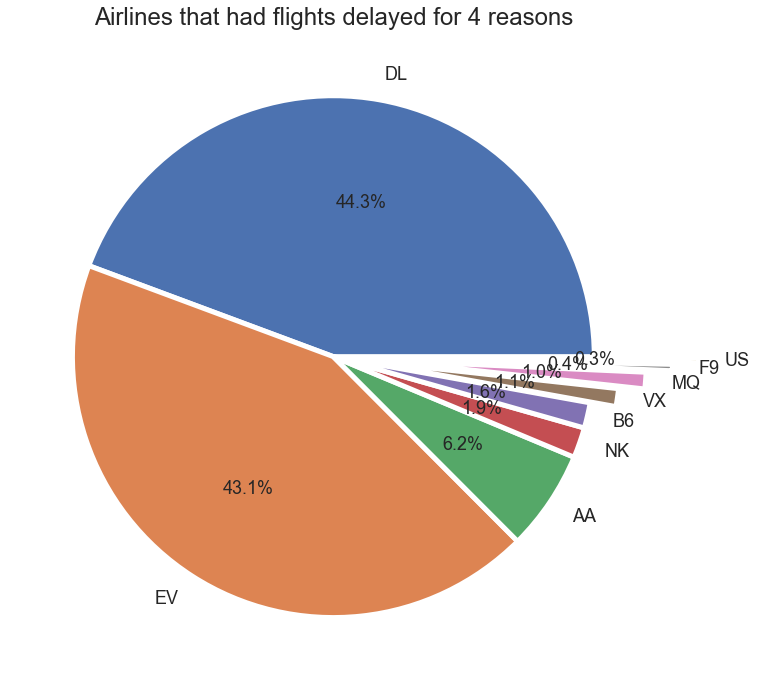

In [194]:
#airlines that had 4 reasons for the delay
labele = list(four['AIRLINE'].value_counts().index)

myExplode = [0,0,0,0,0,0.1,0.2, 0.3, 0.4]
plt.figure(figsize=(20,12))
plt.pie(four['AIRLINE'].value_counts(), autopct = '%.1f%%', labels = labele,explode = myExplode, textprops={'fontsize': 18}, wedgeprops={'linewidth': 5.0, 'edgecolor': 'white'})
plt.title("Airlines that had flights delayed for 4 reasons")
plt.show()

In [195]:
#origin airport-destination airport pairs that had 4 reasons for the delay
origin_destination_four = []

for i in range(four.shape[0]):
    origin = four['ORIGIN_AIRPORT'][i]
    destination = four['DESTINATION_AIRPORT'][i]
    
    origin_destination = (origin,destination)
    origin_destination_four.append(origin_destination)

In [196]:
four['origin_destination_four'] = origin_destination_four
four['origin_destination_four'].value_counts()

(ORD, ATL)    25
(ORD, MSP)    23
(PHL, ATL)    16
(DCA, CLE)    15
(RIC, ATL)    13
              ..
(ATL, CLE)     1
(MCO, SYR)     1
(BHM, IAH)     1
(EWR, MEM)     1
(LGA, TPA)     1
Name: origin_destination_four, Length: 587, dtype: int64

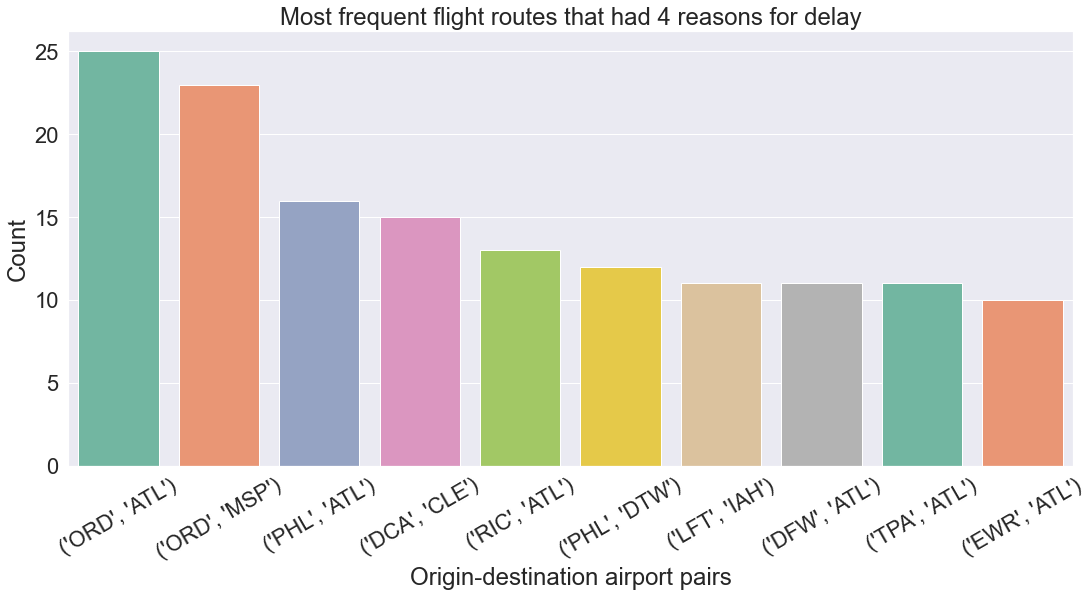

In [197]:
sns.set(font_scale=2, rc={"figure.figsize": (18, 8)}) 
cp = sns.countplot(x="origin_destination_four", data=four,palette='Set2', order = four['origin_destination_four'].value_counts()[:10].index)
plt.xlabel("Origin-destination airport pairs")
plt.setp(cp.get_xticklabels(), rotation=30)
plt.ylabel("Count")
plt.title('Most frequent flight routes that had 4 reasons for delay')
plt.show() 

In [198]:
airports.loc[airports['IATA_CODE'] == 'MSP']

IATA_CODE                                       AIRPORT         CITY  \
216       MSP  Minneapolis-Saint Paul International Airport  Minneapolis   

    STATE  LATITUDE  LONGITUDE  
216    MN  44.88055  -93.21692